# Ascoli Piceno Project

**Group 1:** 
- Inas Elkouch
- Samaher Brahem
- Antonino Pio Lupo
- Mohammadhadi Shahhosseini
- Nazar Liubas
- Franco Reinaldo Bonifacini
- Precious Prince
- Zhaksylyk Tansykbay
- Maged Saeed Abdo Mostafa Kharshom

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
from ydata_profiling import ProfileReport

# Importing data

In [2]:
url='https://drive.google.com/file/d/1ib3Zm61vAGEaA8en8QIWG_ZMyqAzKYHe/view?usp=drive_link'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_ascoli = pd.read_csv(path)

In [3]:
df_ascoli = df_ascoli.drop(columns=['Unnamed: 0'])

In [4]:
df_ascoli.head(5)

age_group                        gender       location  \
0     18-25                          Male  South America   
1     26-35                          Male         Europe   
2     18-25                        Female          Italy   
3     26-35  Other/I prefer not to say it  South America   
4     26-35                        Female          Italy   

                                      italian_region  travel_purpose  \
0                                                NaN         Tourism   
1                                                NaN         Tourism   
2  North (Valle d'Aosta, Piemonte, Lombardia, Lig...         Tourism   
3                                                NaN  I don’t travel   
4  North (Valle d'Aosta, Piemonte, Lombardia, Lig...       Education   

  touristic_travel_freq                    traveler_type  \
0                     1   Family Traveler;Group Traveler   
1                    >5                   Group Traveler   
2                     2                   Group Traveler   
3                     0                  Family Traveler   
4                     3  Family Traveler;Couple Traveler   

                                         trip_org  \
0  Relying on recommendations from friends/family   
1               I plan and book everything myself   
2               I plan and book everything myself   
3               I plan and book everything myself   
4  Relying on recommendations from friends/family   

                                   trip_ideas_source  \
0  Social media platforms (e.g., Instagram, TikTo...   
1  Social media platforms (e.g., Instagram, TikTo...   
2  Social media platforms (e.g., Instagram, TikTo...   
3  Social media platforms (e.g., Instagram, TikTo...   
4  Social media platforms (e.g., Instagram, TikTo...   

                             weekend_distance  ...  food_ascoli food_siena  \
0  100–300 km (Approx. 1.5 to 3 hours by car)  ...            2          5   
1    300–500 km (Approx. 3 to 5 hours by car)  ...            4          1   
2    300–500 km (Approx. 3 to 5 hours by car)  ...            3          2   
3  100–300 km (Approx. 1.5 to 3 hours by car)  ...            1          2   
4  100–300 km (Approx. 1.5 to 3 hours by car)  ...            1          5   

   food_lucca food_pisa  food_venezia  events_ascoli  events_siena  \
0           1         3             4              1             2   
1           5         2             3              4             1   
2           1         5             4              1             2   
3           3         4             5              2             3   
4           4         2             3              3             4   

   events_lucca  events_pisa  events_venezia  
0             3            4               5  
1             5            3               2  
2             5            4               3  
3             4            5               1  
4             2            5               1  

[5 rows x 62 columns]

# Data pre-processing

In [5]:
# We know a case that mistakenly seleted a wrong gender
df_ascoli['gender'].value_counts()

gender
Male                            53
Female                          25
Other/I prefer not to say it     1
Name: count, dtype: int64

In [6]:
# Replace with Male, as we know the respondent was a male.
df_ascoli['gender'] = df_ascoli['gender'].replace({'Other/I prefer not to say it': 'Male'})

In [7]:
# Check now the gender values
df_ascoli['gender'].value_counts()

gender
Male      54
Female    25
Name: count, dtype: int64

In [8]:
# We will drop Italian region, as all answers were from the North region and it won't be useful for our project
df_ascoli = df_ascoli.drop(columns = 'italian_region')

Encoding some categorical values:

In [9]:
# Replace age ranges into ordinal values from 1 to 6
df_ascoli['age_group'] = df_ascoli['age_group'].replace({'<18': 1, '18-25':2, '26-35':3, '36-45':4, '46-55':5, '>55':6})

In [10]:
# Replace male with 1 and female with 0
df_ascoli['gender'] = df_ascoli['gender'].replace({'Male': 1, 'Female':0})

In [11]:
# Replace Yes/No columns into binary columns
df_ascoli[['food_activities_interest', 'offseason_interest', 'private_transport_pref', 'walking_tour_interest']] = df_ascoli[['food_activities_interest', 'offseason_interest', 'private_transport_pref', 'walking_tour_interest']].replace({'Yes': 1, 'No':0})

In [12]:
# Replace >5 in "touristic_travel_freq" to simplify data manipulation
df_ascoli['touristic_travel_freq'] = df_ascoli['touristic_travel_freq'].replace({'>5': 5})
df_ascoli['touristic_travel_freq'] = df_ascoli['touristic_travel_freq'].astype('int')

In [13]:
# Replace >3 in "max_transport" to simplify data manipulation
df_ascoli['max_transport'] = df_ascoli['max_transport'].replace({'>3': 4})
df_ascoli['max_transport'] = df_ascoli['max_transport'].astype('int')

In [14]:
# Replace values in "week_trip_budget" to simplify data manipulation
df_ascoli['week_trip_budget'] = df_ascoli['week_trip_budget'].replace({'<500': 500, '500-2000':(500+2000)/2, '2000-4000':(2000+4000)/2, '>4000':4000})
df_ascoli['week_trip_budget'] = df_ascoli['week_trip_budget'].astype('int')

In [15]:
# Replace values in "night_accommodation_budget" to simplify data manipulation
df_ascoli['night_accommodation_budget'] = df_ascoli['night_accommodation_budget'].replace({'<50': 50, '50-150':(50+150)/2, '150-400':(150+400)/2, '400-700':(400+700)/2, '700>':700})
df_ascoli['night_accommodation_budget'] = df_ascoli['night_accommodation_budget'].astype('int')

In [16]:
# Replace values in "weekend_distance" to simplify data manipulation
df_ascoli['weekend_distance'] = df_ascoli['weekend_distance'].replace({'< 100 km (Approx. 1 hour or less by car)': 100, '100–300 km (Approx. 1.5 to 3 hours by car)':(100+300)/2, '300–500 km (Approx. 3 to 5 hours by car)':(300+500)/2, '> 500 km ( > 5 hours by car)':500})
df_ascoli['weekend_distance'] = df_ascoli['weekend_distance'].astype('int')

In [17]:
# Encode location, travel_purpose and tripo_org with one-hot encoding
location_dummy = pd.get_dummies(df_ascoli['location'], prefix = 'location', drop_first=False)
travel_purpose_dummy = pd.get_dummies(df_ascoli['travel_purpose'], prefix = 'travel_purpose',drop_first=False)
trip_org_dummy = pd.get_dummies(df_ascoli['trip_org'], prefix = 'trip_org', drop_first=False)

In [18]:
# Add the dummy variables again to df_ascoli, and remove original columns
df_ascoli = pd.concat([df_ascoli, location_dummy, travel_purpose_dummy, trip_org_dummy], axis=1)

df_ascoli = df_ascoli.drop(['travel_purpose', 'trip_org'], axis=1)

In [19]:
# Separate multi-answer columns into individual columns for one-hot encoding, and then removing original columns
def multi_one_hot(df, column, prefix):

    exploded = df[column].str.split(';').explode()
    
    dummies = pd.get_dummies(exploded)

    dummies.columns = [f"{prefix}_{col}" for col in dummies.columns]
    
    one_hot = dummies.groupby(dummies.index).max()
    
    return one_hot

traveler_type_one_hot = multi_one_hot(df_ascoli, 'traveler_type', 'traveler_type')
trip_ideas_source_one_hot = multi_one_hot(df_ascoli, 'trip_ideas_source', 'trip_ideas_source')
arch_interest_one_hot = multi_one_hot(df_ascoli, 'arch_interest', 'arch_interest')

df_ascoli = pd.concat([df_ascoli, traveler_type_one_hot, trip_ideas_source_one_hot, arch_interest_one_hot], axis=1)

df_ascoli = df_ascoli.drop(['location', 'traveler_type', 'trip_ideas_source', 'arch_interest'], axis=1)

In [20]:
# Change boolean columns into binary
df_ascoli.iloc[:, 55:91] = df_ascoli.iloc[:, 55:91].astype(int)

# Segmentation

## Data preparation

In [21]:
# We will remove some columns which are used in other models and won't be used in segmentation
df_segmentation = df_ascoli.drop(columns=['wine_cheap', 'wine_good', 'wine_expensive', 'wine_too_expensive', 'quintana_cheap', 'quintana_good',
                                    'quintana_expensive', 'quintana_too_expensive', 'ascoliva_cheap', 'ascoliva_good', 'ascoliva_expensive',
                                    'ascoliva_too_expensive', 'tour_cheap', 'tour_good', 'tour_expensive', 'tour_too_expensive', 'rating_ascoli',
                                    'rating_siena', 'rating_lucca', 'rating_pisa', 'rating_venezia',  'food_ascoli', 'food_siena', 'food_lucca',
                                    'food_pisa', 'food_venezia', 'events_ascoli', 'events_siena', 'events_lucca', 'events_pisa', 'events_venezia'])

In [22]:
df_segmentation.head(5)

age_group  gender  touristic_travel_freq  weekend_distance  \
0          2       1                      1               200   
1          3       1                      5               400   
2          2       0                      2               400   
3          3       1                      0               200   
4          3       0                      3               200   

   historic_importance  restaurant_reviews_importance  \
0                    3                              2   
1                    3                              5   
2                    4                              3   
3                    5                              5   
4                    4                              4   

   food_activities_interest  attr_public_transport  attr_prices  \
0                         1                      7            3   
1                         1                      5            3   
2                         1                      7            4   
3                         0                      6            8   
4                         1                      2            3   

   attr_accommodation  ...  \
0                   6  ...   
1                   4  ...   
2                   3  ...   
3                   1  ...   
4                   4  ...   

   trip_ideas_source_Recommendations from friends or family  \
0                                                  1          
1                                                  1          
2                                                  0          
3                                                  0          
4                                                  1          

   trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   trip_ideas_source_TV shows, movies, or documentaries  \
0                                                  0      
1                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      

   trip_ideas_source_Travel agencies or brochures  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   trip_ideas_source_Travel blogs or websites  arch_interest_Bridges  \
0                                           1                      1   
1                                           1                      0   
2                                           0                      0   
3                                           1                      1   
4                                           1                      1   

   arch_interest_Castles and fortifications  arch_interest_Ports  \
0                                         1                    0   
1                                         1                    1   
2                                         0                    0   
3                                         0                    0   
4                                         1                    0   

   arch_interest_Public squares  arch_interest_Religious sites  
0                             1                              0  
1                             1                              0  
2                             1                              1  
3                        

In [23]:
df_segmentation['public_transport_importance'] = df_segmentation['public_transport_importance'].fillna(0)

In [24]:
df_segmentation.columns

Index(['age_group', 'gender', 'touristic_travel_freq', 'weekend_distance',
       'historic_importance', 'restaurant_reviews_importance',
       'food_activities_interest', 'attr_public_transport', 'attr_prices',
       'attr_accommodation', 'attr_food', 'attr_history', 'attr_events',
       'attr_landscape', 'attr_tourist_packs', 'week_trip_budget',
       'night_accommodation_budget', 'discount_importance',
       'guided_tours_importance', 'offseason_interest',
       'private_transport_pref', 'public_transport_importance',
       'max_transport', 'walking_tour_interest', 'location_Africa',
       'location_Asia', 'location_Europe', 'location_Italy',
       'location_South America', 'travel_purpose_Business',
       'travel_purpose_Education', 'travel_purpose_I don’t travel',
       'travel_purpose_Tourism', 'travel_purpose_Visiting family/friends',
       'trip_org_I don't go abroad and when traveling inside my country, I go with my family, and they do all the things.',
       'tri

In [25]:
df_segmentation.head(5)

age_group  gender  touristic_travel_freq  weekend_distance  \
0          2       1                      1               200   
1          3       1                      5               400   
2          2       0                      2               400   
3          3       1                      0               200   
4          3       0                      3               200   

   historic_importance  restaurant_reviews_importance  \
0                    3                              2   
1                    3                              5   
2                    4                              3   
3                    5                              5   
4                    4                              4   

   food_activities_interest  attr_public_transport  attr_prices  \
0                         1                      7            3   
1                         1                      5            3   
2                         1                      7            4   
3                         0                      6            8   
4                         1                      2            3   

   attr_accommodation  ...  \
0                   6  ...   
1                   4  ...   
2                   3  ...   
3                   1  ...   
4                   4  ...   

   trip_ideas_source_Recommendations from friends or family  \
0                                                  1          
1                                                  1          
2                                                  0          
3                                                  0          
4                                                  1          

   trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   trip_ideas_source_TV shows, movies, or documentaries  \
0                                                  0      
1                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      

   trip_ideas_source_Travel agencies or brochures  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   trip_ideas_source_Travel blogs or websites  arch_interest_Bridges  \
0                                           1                      1   
1                                           1                      0   
2                                           0                      0   
3                                           1                      1   
4                                           1                      1   

   arch_interest_Castles and fortifications  arch_interest_Ports  \
0                                         1                    0   
1                                         1                    1   
2                                         0                    0   
3                                         0                    0   
4                                         1                    0   

   arch_interest_Public squares  arch_interest_Religious sites  
0                             1                              0  
1                             1                              0  
2                             1                              1  
3                        

## Clustering with Attributes

For the segmentation we will use only the **attributes columns**:

In [26]:
df_attributes = df_segmentation[['attr_public_transport', 'attr_prices', 'attr_accommodation', 'attr_food', 'attr_history', 'attr_events',
                           'attr_landscape', 'attr_tourist_packs']]

In [27]:
df_attributes.head(5)

attr_public_transport  attr_prices  attr_accommodation  attr_food  \
0                      7            3                   6          4   
1                      5            3                   4          1   
2                      7            4                   3          1   
3                      6            8                   1          7   
4                      2            3                   4          1   

   attr_history  attr_events  attr_landscape  attr_tourist_packs  
0             2            5               1                   8  
1             7            6               2                   8  
2             5            6               2                   8  
3             5            4               3                   2  
4             6            8               5                   7

In [28]:
df_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   attr_public_transport  79 non-null     int64
 1   attr_prices            79 non-null     int64
 2   attr_accommodation     79 non-null     int64
 3   attr_food              79 non-null     int64
 4   attr_history           79 non-null     int64
 5   attr_events            79 non-null     int64
 6   attr_landscape         79 non-null     int64
 7   attr_tourist_packs     79 non-null     int64
dtypes: int64(8)
memory usage: 5.1 KB


First we check with the **Elbow plot** if there is a clear **optimal number of kclsuters**:

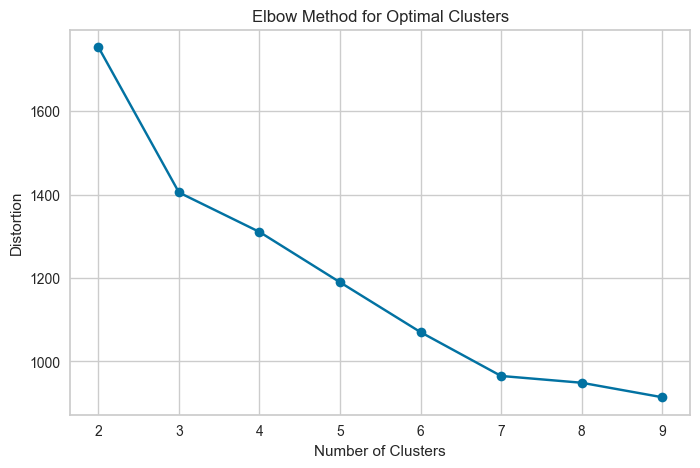

In [29]:
distortions = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_attributes)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

From the Elbow plot we can see a **clear kink in 3**. There is also in 7, but for us is too high and even can lead to overfitting.

Furthermore, we use the **Silhouette plot** to check if this number of cluster persist or we have another optimal value:

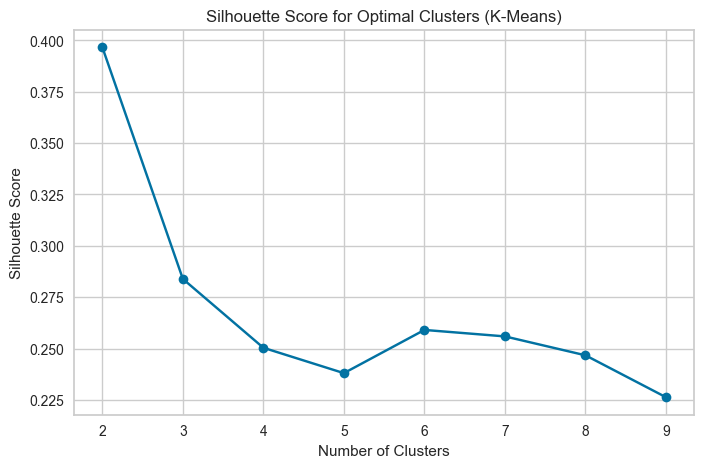

In [30]:
K = range(2, 10)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_attributes)
    score = silhouette_score(df_attributes, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.39998291897311333
For n_clusters = 3 The average silhouette_score is : 0.320469496567752
For n_clusters = 4 The average silhouette_score is : 0.2978862887374465
For n_clusters = 5 The average silhouette_score is : 0.2533573474910317


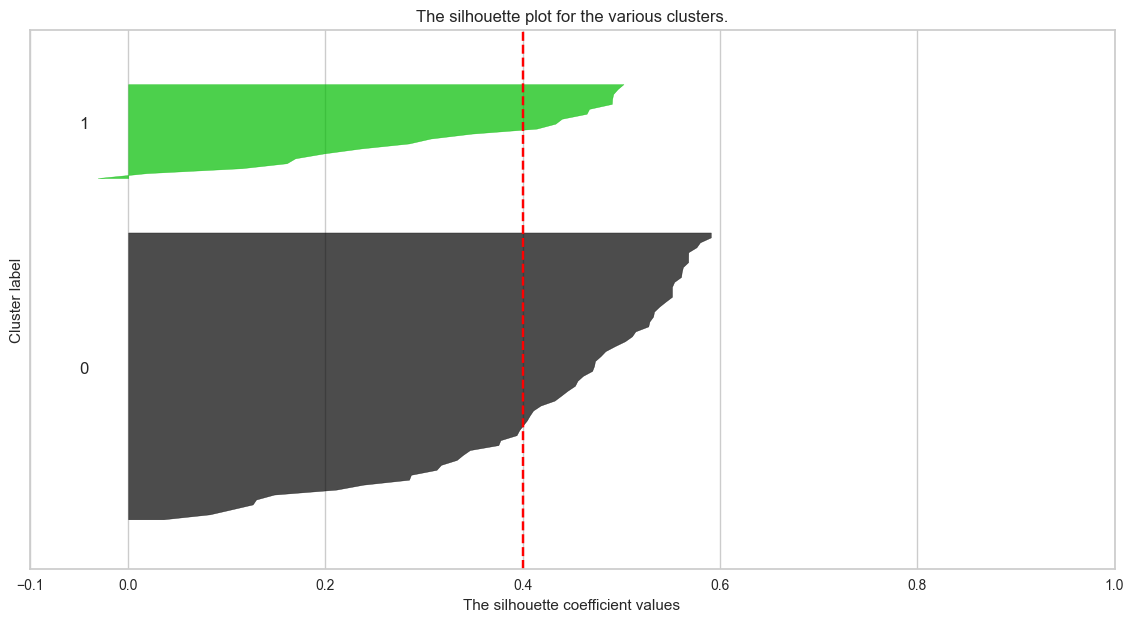

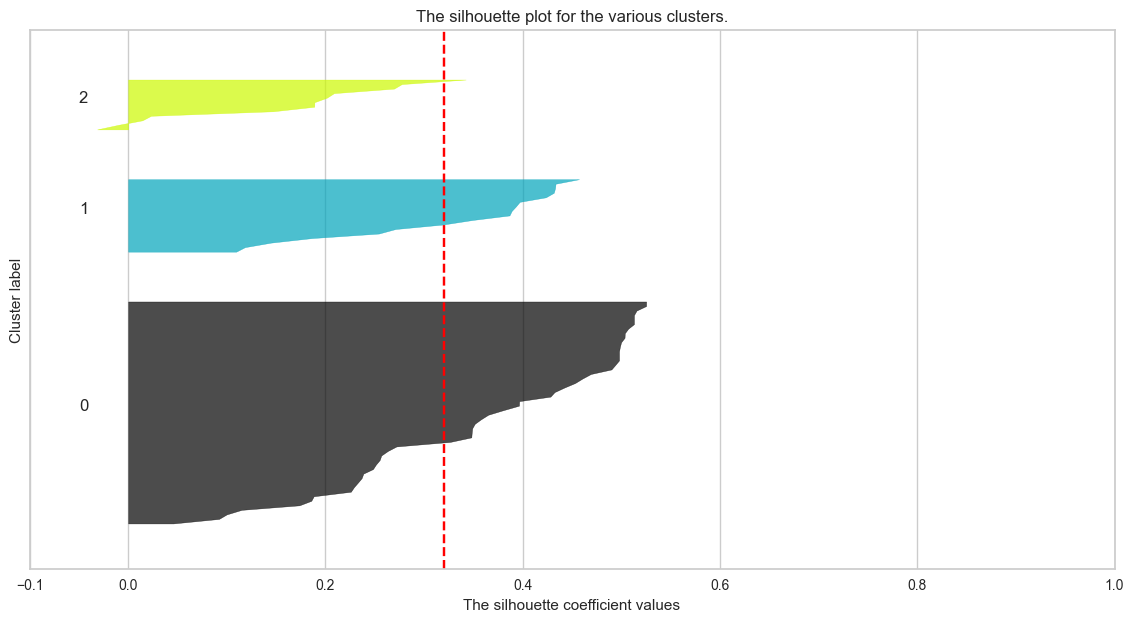

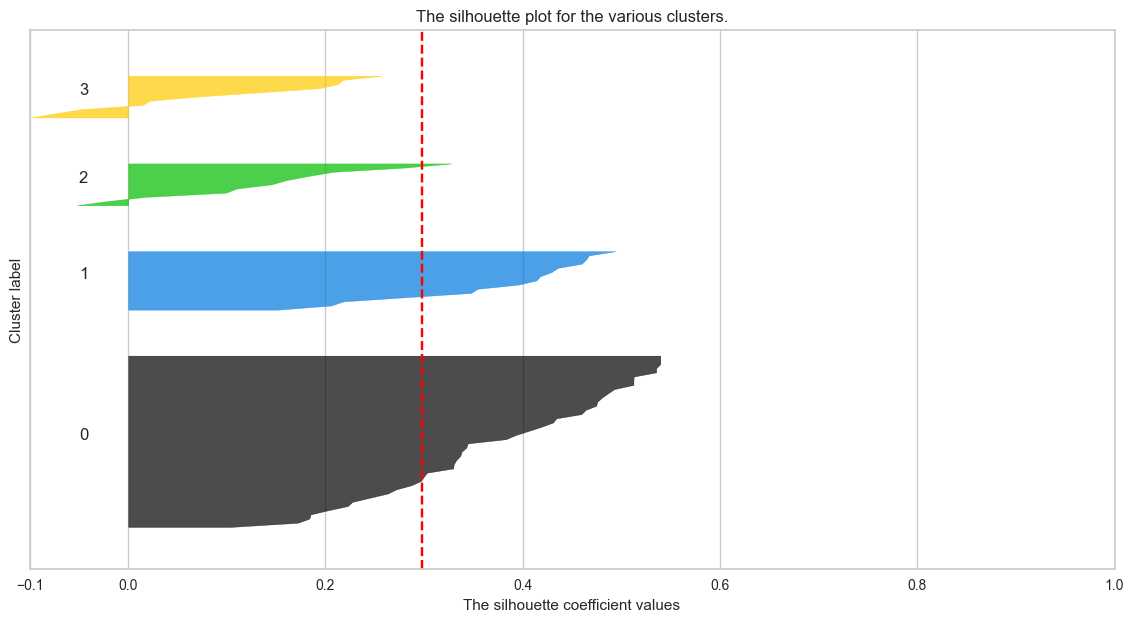

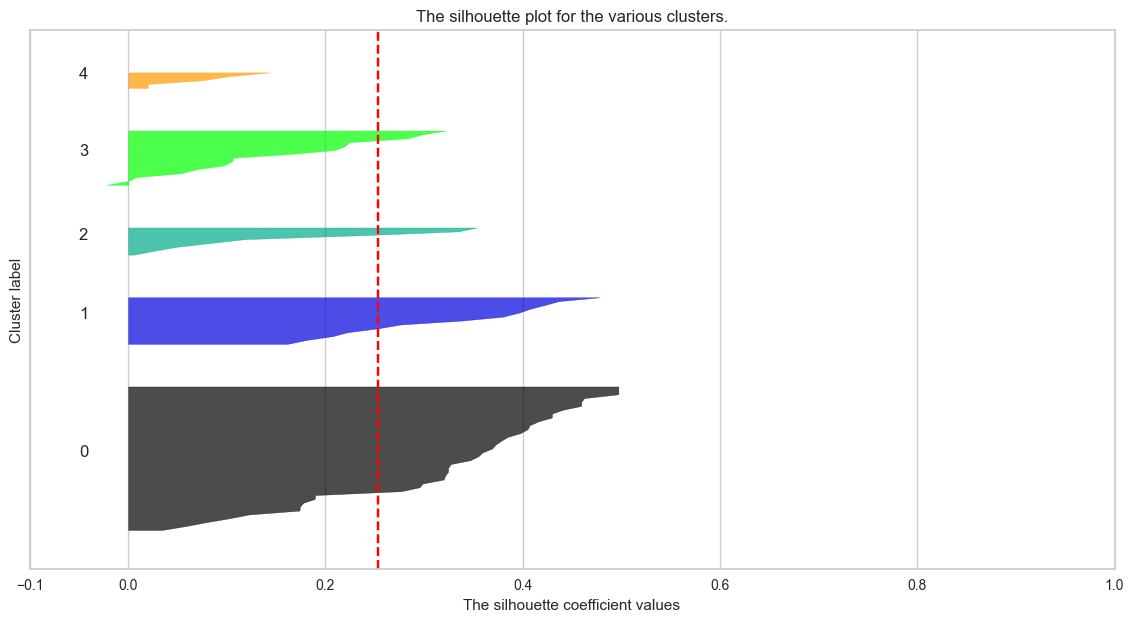

In [31]:
X = df_attributes.to_numpy()
range_n_clusters = [2, 3, 4, 5]

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 7)

    # Silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

From this Silhouette plot we **don't have a clear peack**, although **k=2** is the highest value.

Finally, as we have **k=3 from Elbow method**, and **k=2 from Silhouette method**, we will finally use **DBI (Davies–Bouldin index)** to determine which one is a better cluster. The index is improved (lowered) by increased separation between clusters and decreased variation within clusters.

In [32]:
optimal_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in optimal_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_attributes)
    
    db_index = davies_bouldin_score(df_attributes, cluster_labels)
    print(f"Davies-Bouldin Index for k={k}: {db_index}")

Davies-Bouldin Index for k=2: 1.0680165713457712
Davies-Bouldin Index for k=3: 1.4301099843395964
Davies-Bouldin Index for k=4: 1.7869433398290706
Davies-Bouldin Index for k=5: 1.5844140720233557
Davies-Bouldin Index for k=6: 1.427585068752802
Davies-Bouldin Index for k=7: 1.312816281226792
Davies-Bouldin Index for k=8: 1.6196663113028733
Davies-Bouldin Index for k=9: 1.4945143411208333
Davies-Bouldin Index for k=10: 1.3989623538951823


From the DBI analysis, we can determine that **k=2 is the optimal number of clusters for our project**.

## K-Means (2 segments)

Perform clustering with K=2 and add cluster labels back to dataset and show first 5 rows.

In [33]:
df_attributes["SegmentKM"] = KMeans(n_clusters=2,random_state=42).fit(df_attributes).labels_
df_attributes["SegmentKM"] = df_attributes["SegmentKM"] + 1
df_attributes.head(5)

C:\Users\franc\AppData\Local\Temp\ipykernel_9452\1297209436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attributes["SegmentKM"] = KMeans(n_clusters=2,random_state=42).fit(df_attributes).labels_
C:\Users\franc\AppData\Local\Temp\ipykernel_9452\1297209436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attributes["SegmentKM"] = df_attributes["SegmentKM"] + 1


attr_public_transport  attr_prices  attr_accommodation  attr_food  \
0                      7            3                   6          4   
1                      5            3                   4          1   
2                      7            4                   3          1   
3                      6            8                   1          7   
4                      2            3                   4          1   

   attr_history  attr_events  attr_landscape  attr_tourist_packs  SegmentKM  
0             2            5               1                   8          2  
1             7            6               2                   8          2  
2             5            6               2                   8          2  
3             5            4               3                   2          1  
4             6            8               5                   7          2

**Segment sizes:**

In [34]:
df_attributes_sizes = pd.DataFrame(df_attributes.groupby("SegmentKM").size(),columns=["Size"]).T
df_attributes_sizes.insert(0,"Population",len(df_attributes))
df_attributes_sizes.loc["%"] = df_attributes_sizes.iloc[0].div(df_attributes_sizes.iloc[0,0]).mul(100).astype(int)
df_attributes_sizes

SegmentKM  Population   1   2
Size               79  19  60
%                 100  24  75

## Segments description with Attributes


**Means of segmentation variables by segment:**


In [35]:
df_attributes_Means = df_attributes.groupby("SegmentKM").mean().T
df_attributes_Means.insert(0,"Population",df_attributes.drop(columns="SegmentKM").mean())
df_attributes_Means.round(2)

SegmentKM              Population     1     2
attr_public_transport        3.90  5.63  3.35
attr_prices                  3.33  6.00  2.48
attr_accommodation           3.90  6.16  3.18
attr_food                    3.87  5.21  3.45
attr_history                 4.46  3.79  4.67
attr_events                  5.49  2.84  6.33
attr_landscape               4.95  4.53  5.08
attr_tourist_packs           6.10  1.84  7.45

**Significance of means differences between each segment and the rest of the population:**


In [36]:
from scipy import stats
#from statsmodels.stats import weightstats as st

X = df_attributes.copy()

def style_cols(col):
    if col.name == "Population": return ["background-color: white"]*len(col)
    
    segment = X[X.SegmentKM == col.name]
    rest_pop = X[X.SegmentKM != col.name]
    
    colors = []
    for var_name, var_segment_mean in col.items():
        t_test, p_value = stats.ttest_ind(segment[var_name], rest_pop[var_name],equal_var=False)
        #_,p_value,_ = st.ttest_ind(segment[var_name],rest_pop[var_name],usevar="unequal")    
        if p_value < 0.05:
            color = "background-color: green" if var_segment_mean > rest_pop[var_name].mean() else "background-color: red"
        elif p_value < 0.1:
            color = "background-color: #90ee90" if var_segment_mean > rest_pop[var_name].mean() else "background-color: #f1807e"
        else: color = "background-color: white"
        colors.append(color)
    return colors

df_attributes_Means.style.apply(style_cols).format("{:.2f}")

## Segmentation space using PCA (with pca package)


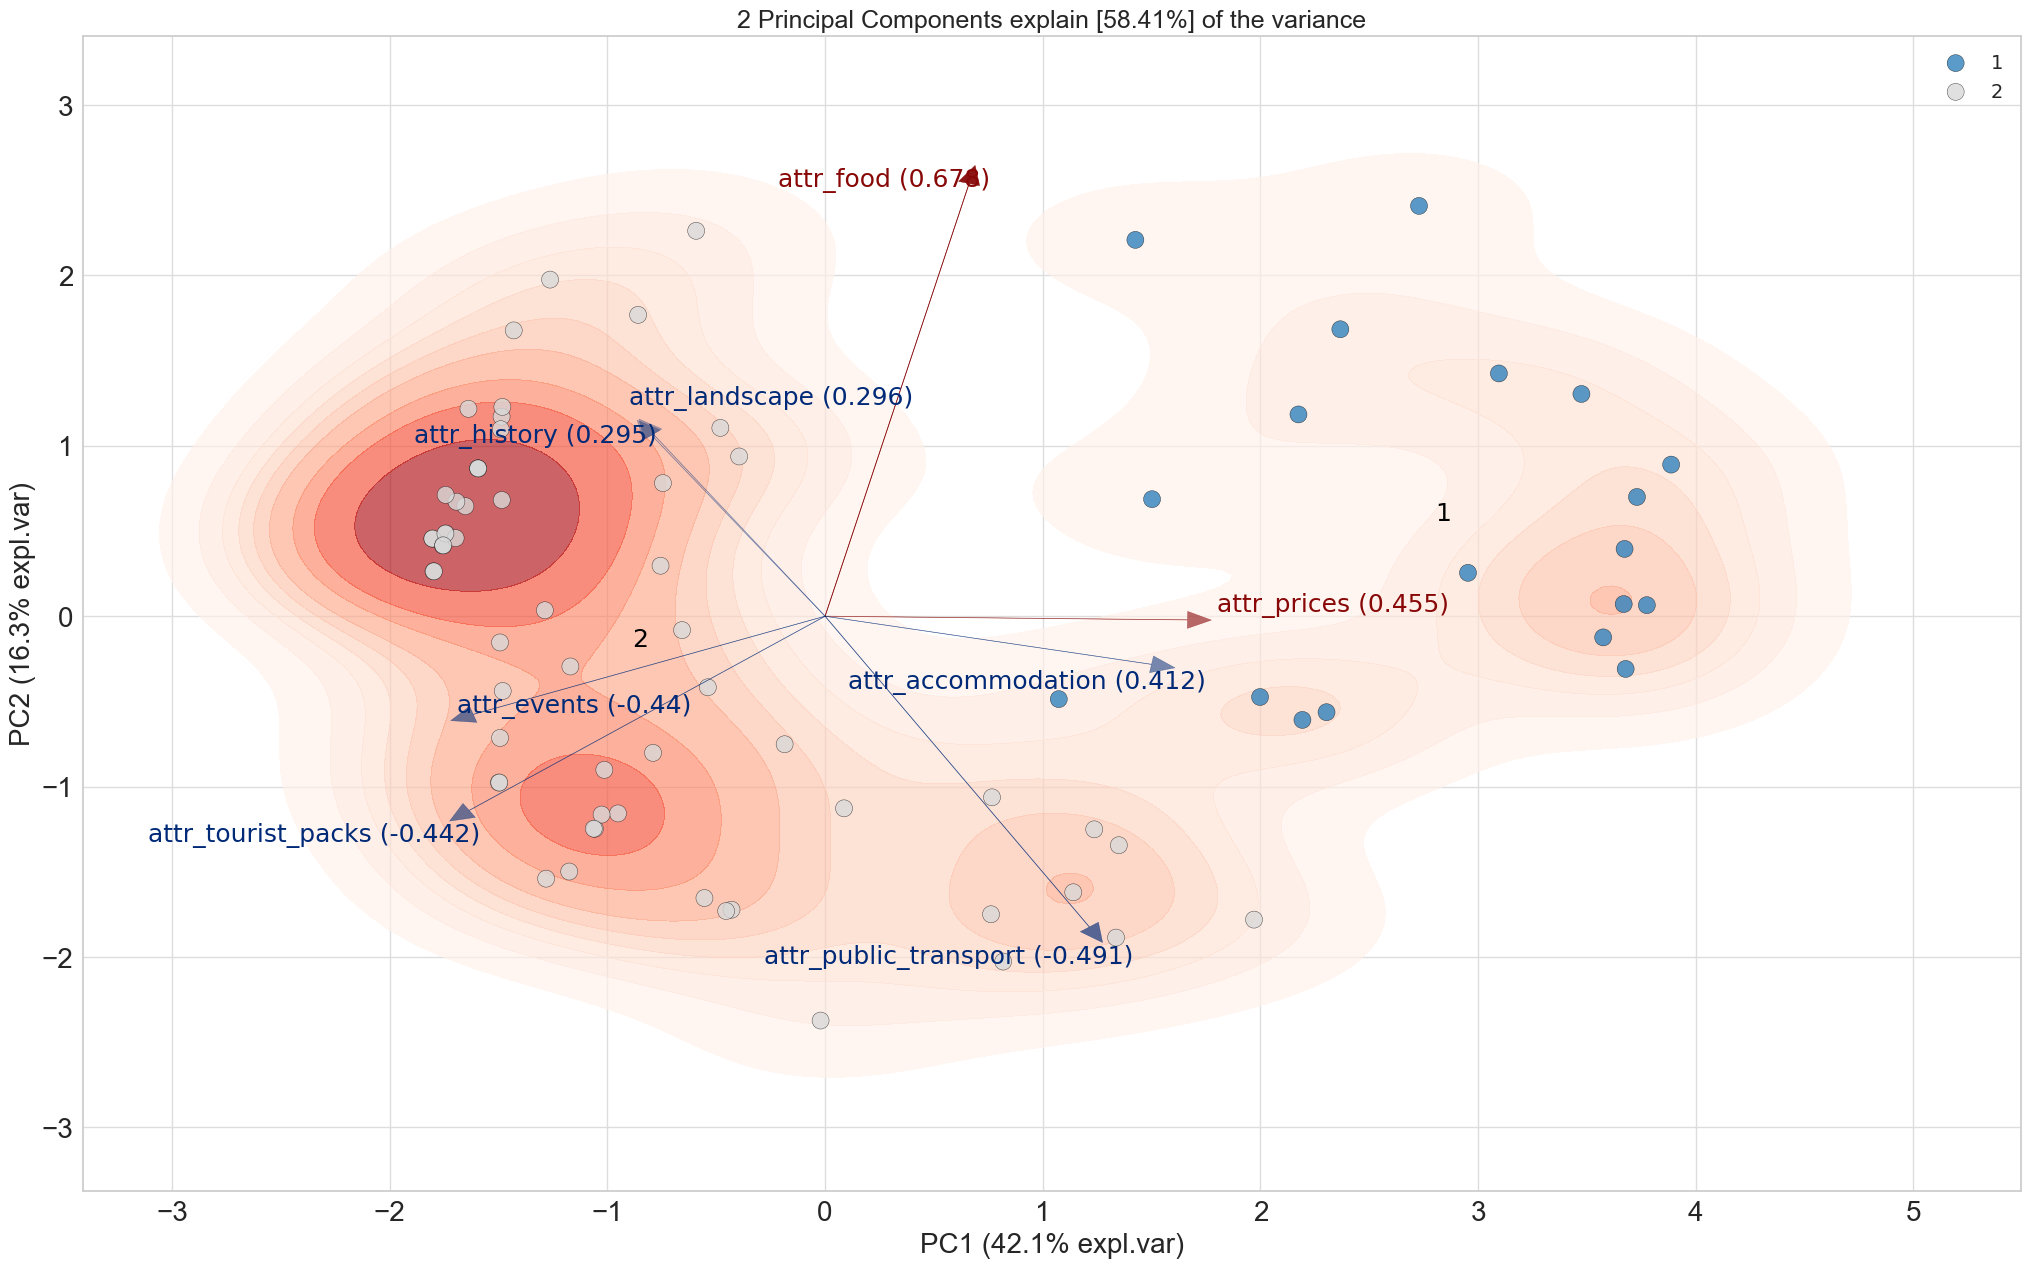

In [37]:
import logging, sys
logging.disable(sys.maxsize)

from pca import pca
model = pca(n_components=2,normalize=True)

features = df_attributes.drop(columns="SegmentKM")
segments = df_attributes.SegmentKM

# Fit transform
results = model.fit_transform(features,verbose=False)
# Make biplot with the number of features
# Strenght of the loadings are shown in two colors (red=strong, blue=weak)
fig, ax = model.biplot(labels=segments,verbose=0,density=True);

## Descriptors


### Defining Descriptors

First we obtain the **dataset of descriptors (excluding attributes)**.

In [38]:
df_descriptor = df_segmentation[['age_group', 'gender', 'touristic_travel_freq', 'weekend_distance',
                           'historic_importance', 'restaurant_reviews_importance', 'food_activities_interest', 'week_trip_budget',
                           'discount_importance', 'guided_tours_importance', 'offseason_interest', 'max_transport', 'travel_purpose_Business',
                           'travel_purpose_Education', 'travel_purpose_I don’t travel', 'travel_purpose_Tourism',
                           'travel_purpose_Visiting family/friends',
                           "trip_org_I don't go abroad and when traveling inside my country, I go with my family, and they do all the things.",
                           'trip_org_I plan and book everything myself',
                           'trip_org_Internet recommendations and blogs',
                           'trip_org_No organization whatsoever',
                           'trip_org_Relying on recommendations from friends/family',
                           'trip_org_Through a travel agency or tour operator',
                           'traveler_type_Couple Traveler', 'traveler_type_Family Traveler',
                           'traveler_type_Group Traveler', 'traveler_type_Solo Traveler',
                           "trip_ideas_source_Again, I do not travel abroad, but if I were to I'd use all the above.",
                           'trip_ideas_source_Chat gpt', 'trip_ideas_source_Magazines or books',
                           'trip_ideas_source_My own bucket list or usually depends upon the transport cost',
                           'trip_ideas_source_Online travel platforms (e.g., TripAdvisor, Booking.com, Expedia)',
                           'trip_ideas_source_Random Places, Historic or with something that is appealing at a ceratin time or mood.',
                           'trip_ideas_source_Recommendations from friends or family',
                           'trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)',
                           'trip_ideas_source_TV shows, movies, or documentaries',
                           'trip_ideas_source_Travel agencies or brochures',
                           'trip_ideas_source_Travel blogs or websites', 'arch_interest_Bridges',
                           'arch_interest_Castles and fortifications', 'arch_interest_Ports',
                           'arch_interest_Public squares', 'arch_interest_Religious sites']]

In [39]:
df_descriptor.head(5)

age_group  gender  touristic_travel_freq  weekend_distance  \
0          2       1                      1               200   
1          3       1                      5               400   
2          2       0                      2               400   
3          3       1                      0               200   
4          3       0                      3               200   

   historic_importance  restaurant_reviews_importance  \
0                    3                              2   
1                    3                              5   
2                    4                              3   
3                    5                              5   
4                    4                              4   

   food_activities_interest  week_trip_budget  discount_importance  \
0                         1              3000                    4   
1                         1              1250                    4   
2                         1              1250                    2   
3                         0              3000                    3   
4                         1              1250                    5   

   guided_tours_importance  ...  \
0                        3  ...   
1                        3  ...   
2                        2  ...   
3                        2  ...   
4                        4  ...   

   trip_ideas_source_Recommendations from friends or family  \
0                                                  1          
1                                                  1          
2                                                  0          
3                                                  0          
4                                                  1          

   trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   trip_ideas_source_TV shows, movies, or documentaries  \
0                                                  0      
1                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      

   trip_ideas_source_Travel agencies or brochures  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   trip_ideas_source_Travel blogs or websites  arch_interest_Bridges  \
0                                           1                      1   
1                                           1                      0   
2                                           0                      0   
3                                           1                      1   
4                                           1                      1   

   arch_interest_Castles and fortifications  arch_interest_Ports  \
0                                         1                    0   
1                                         1                    1   
2                                         0                    0   
3                                         0                    0   
4                                         1                    0   

   arch_interest_Public squares  arch_interest_Religious sites  
0                             1                              0  
1                             1                              0  
2                             1           

Add **segment labels**:

In [40]:
df_descriptor["SegmentKM"] = df_attributes["SegmentKM"]
print("DataFrame: df_descriptor (with 'SegmentKM' column added)")
df_descriptor.head(5)

DataFrame: df_descriptor (with 'SegmentKM' column added)


C:\Users\franc\AppData\Local\Temp\ipykernel_9452\2242582482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptor["SegmentKM"] = df_attributes["SegmentKM"]


age_group  gender  touristic_travel_freq  weekend_distance  \
0          2       1                      1               200   
1          3       1                      5               400   
2          2       0                      2               400   
3          3       1                      0               200   
4          3       0                      3               200   

   historic_importance  restaurant_reviews_importance  \
0                    3                              2   
1                    3                              5   
2                    4                              3   
3                    5                              5   
4                    4                              4   

   food_activities_interest  week_trip_budget  discount_importance  \
0                         1              3000                    4   
1                         1              1250                    4   
2                         1              1250                    2   
3                         0              3000                    3   
4                         1              1250                    5   

   guided_tours_importance  ...  \
0                        3  ...   
1                        3  ...   
2                        2  ...   
3                        2  ...   
4                        4  ...   

   trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   trip_ideas_source_TV shows, movies, or documentaries  \
0                                                  0      
1                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      

   trip_ideas_source_Travel agencies or brochures  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   trip_ideas_source_Travel blogs or websites  arch_interest_Bridges  \
0                                           1                      1   
1                                           1                      0   
2                                           0                      0   
3                                           1                      1   
4                                           1                      1   

   arch_interest_Castles and fortifications  arch_interest_Ports  \
0                                         1                    0   
1                                         1                    1   
2                                         0                    0   
3                                         0                    0   
4                                         1                    0   

   arch_interest_Public squares  arch_interest_Religious sites  SegmentKM  
0                             1                              0          2  
1                             1                              0          2  
2                             1                              1          2  
3                             0                              0          1  
4                             1                              1          2  

[5 rows x 44 columns]

As we had **some trouble selecting important descriptors**, and we don't want to exclude any significant descriptor, we will first run a **Random Forest** to determine main descriptors:

In [41]:
from sklearn.ensemble import RandomForestClassifier

X = df_descriptor.drop(columns="SegmentKM")
y = df_descriptor.SegmentKM

rf = RandomForestClassifier(n_estimators = 30,random_state = 42)
rf.fit(X, y)

RandomForestClassifier(n_estimators=30, random_state=42)

In [42]:
importances = pd.DataFrame([rf.feature_importances_], columns=X.columns, index=["Importance"])
importances = importances.T  # Transpose for better readability
importances = importances.sort_values(by="Importance", ascending=False)  # Sort descending
print(importances.round(2))

                                                    Importance
restaurant_reviews_importance                             0.09
weekend_distance                                          0.08
guided_tours_importance                                   0.07
week_trip_budget                                          0.06
touristic_travel_freq                                     0.05
historic_importance                                       0.05
trip_org_Through a travel agency or tour operator         0.04
discount_importance                                       0.04
arch_interest_Ports                                       0.04
age_group                                                 0.03
traveler_type_Family Traveler                             0.03
max_transport                                             0.03
gender                                                    0.03
arch_interest_Bridges                                     0.03
arch_interest_Religious sites                          

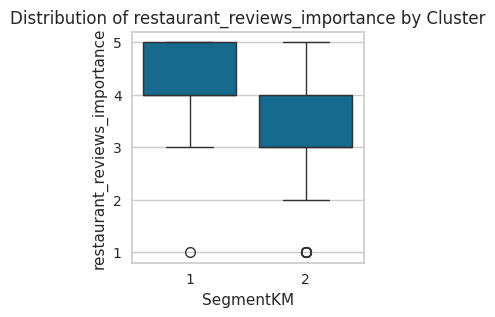

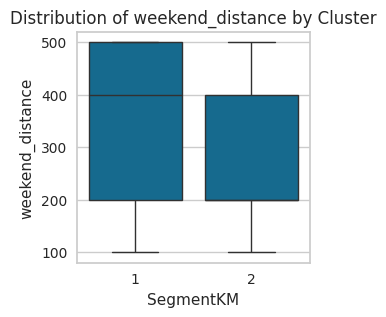

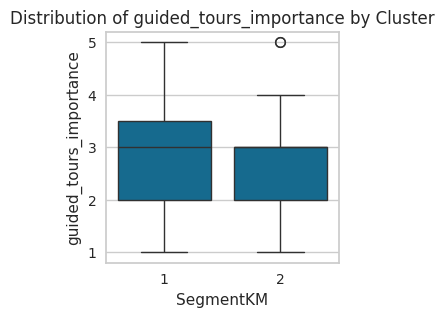

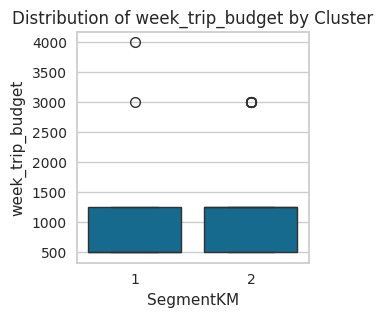

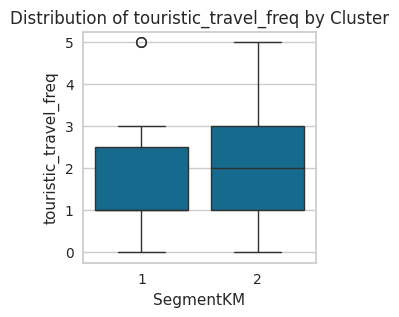

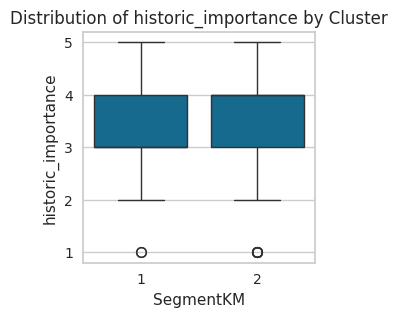

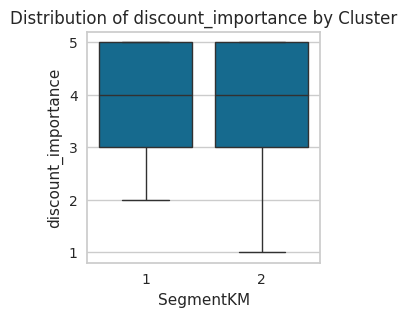

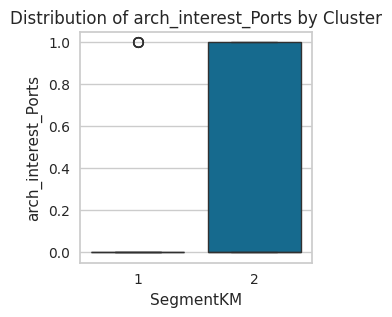

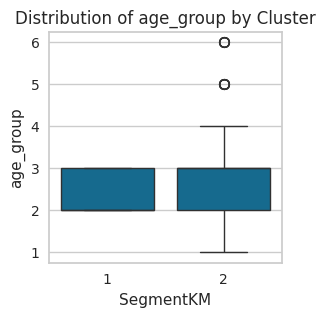

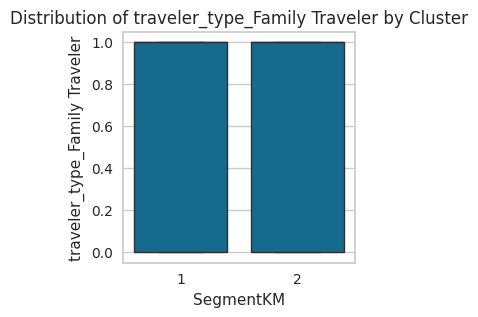

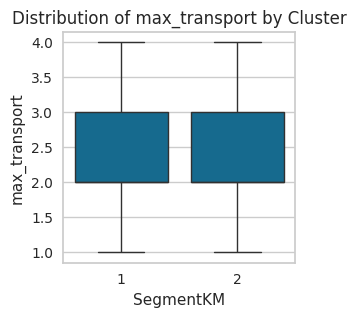

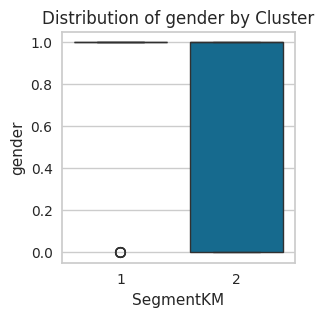

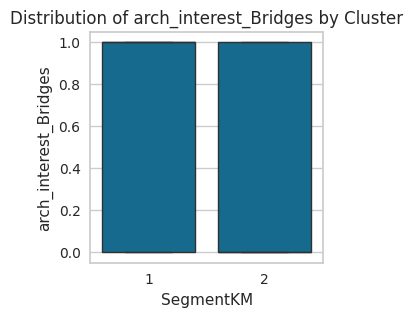

In [43]:
for col in ['restaurant_reviews_importance', 'weekend_distance', 'guided_tours_importance',
                                   'week_trip_budget', 'touristic_travel_freq', 'historic_importance', 'discount_importance',
                                       'arch_interest_Ports', 'age_group', 'traveler_type_Family Traveler', 'max_transport',
                                       'gender', 'arch_interest_Bridges']:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x="SegmentKM", y=col, data=df_descriptor)
    plt.title(f"Distribution of {col} by Cluster")
    plt.show()

We will just keep those equal or above 0,03, but also removing those descriptors that do not discriminate clusters well (from box plots):
- **"trip_org_Through a travel agency or tour operator"**: could be included in the original attribute of touristic agencies."
- **"guided_tours_importance"**: apart from not discriminating clearly the two clusters, also can be explained in some way by attribute "tourist packs"
- **"week_trip_budget"**: does not discriminate clusters, even box plot are identical.
- **"historic_importance"**: doesn't discriminates well clusters, and is already explained by attribute history.
- **"discount_importance"**: doesn't discriminate clear the clusters, and make ssense as it is a question that everyone prefers (discounts).
- **"traveler_type_Family Traveler"**: doesn't discriminate clear the clusters.
- **"max_transport"**: doesn't discriminate clear the clusters and also can be included in attribute "transportation".
- **"arch_interest_Bridges"**: doesn't discriminate clear the clusters.

Special cases:
- **"age"**: although is not so good for cluster discrimination, we consider it an important descriptor.
- **"arch_interest_Ports"**: although seems important and discriminates clusters, we excluded this because without it cumulative variance of PCA improved and we consider it not important for describing clusters as we already removed all questions similar or related to it.

In [44]:
df_descriptor_filtered = df_descriptor[['age_group', 'gender', 'restaurant_reviews_importance', 'weekend_distance', 'touristic_travel_freq', 'SegmentKM']]

In [45]:
X = df_descriptor_filtered.drop(columns="SegmentKM")
y = df_descriptor_filtered.SegmentKM

rf = RandomForestClassifier(n_estimators = 30,random_state = 42)
rf.fit(X, y)

RandomForestClassifier(n_estimators=30, random_state=42)

In [46]:
importances = pd.DataFrame([rf.feature_importances_],columns=X.columns,index=["Importance"])
importances.round(2)

age_group  gender  restaurant_reviews_importance  \
Importance       0.13    0.15                           0.27   

            weekend_distance  touristic_travel_freq  
Importance              0.23                   0.23

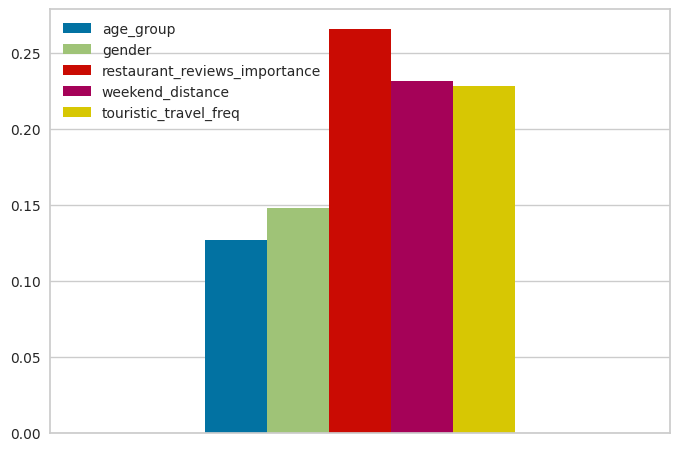

In [47]:
importances.plot.bar(xticks=[]);

### Descriptors by Segments


Means of descriptor variables by segment:

In [48]:
df_descriptor_filtered_Means = df_descriptor_filtered.groupby("SegmentKM").mean().T
df_descriptor_filtered_Means.insert(0,"Population",df_descriptor.drop(columns="SegmentKM").mean())
df_descriptor_filtered_Means.round(1)

SegmentKM                      Population      1      2
age_group                             2.8    2.4    2.9
gender                                0.7    0.8    0.6
restaurant_reviews_importance         3.5    4.2    3.3
weekend_distance                    286.1  331.6  271.7
touristic_travel_freq                 2.1    1.8    2.1

Significance of means differences:

In [49]:
def style_cols(col):
    if col.name == "Population": return ["background-color: white"]*len(col)
    
    segment_data = df_descriptor_filtered[df_descriptor_filtered["SegmentKM"] == col.name]
    rest_pop_data = df_descriptor_filtered[df_descriptor_filtered["SegmentKM"] != col.name]
    
    colors = []
    for var, var_segment_mean in col.items():
        _, p_value = stats.ttest_ind(segment_data[var], rest_pop_data[var],equal_var=False)
        if p_value < 0.05:
            color = "background-color: green" if var_segment_mean > rest_pop_data[var].mean() else "background-color: red"
        elif p_value < 0.1:
            color = "background-color: #90ee90" if var_segment_mean > rest_pop_data[var].mean() else "background-color: #f1807e"
        else: color = "background-color: white"
        colors.append(color)
    return colors

df_descriptor_filtered_Means.style.apply(style_cols).format("{:.1f}")

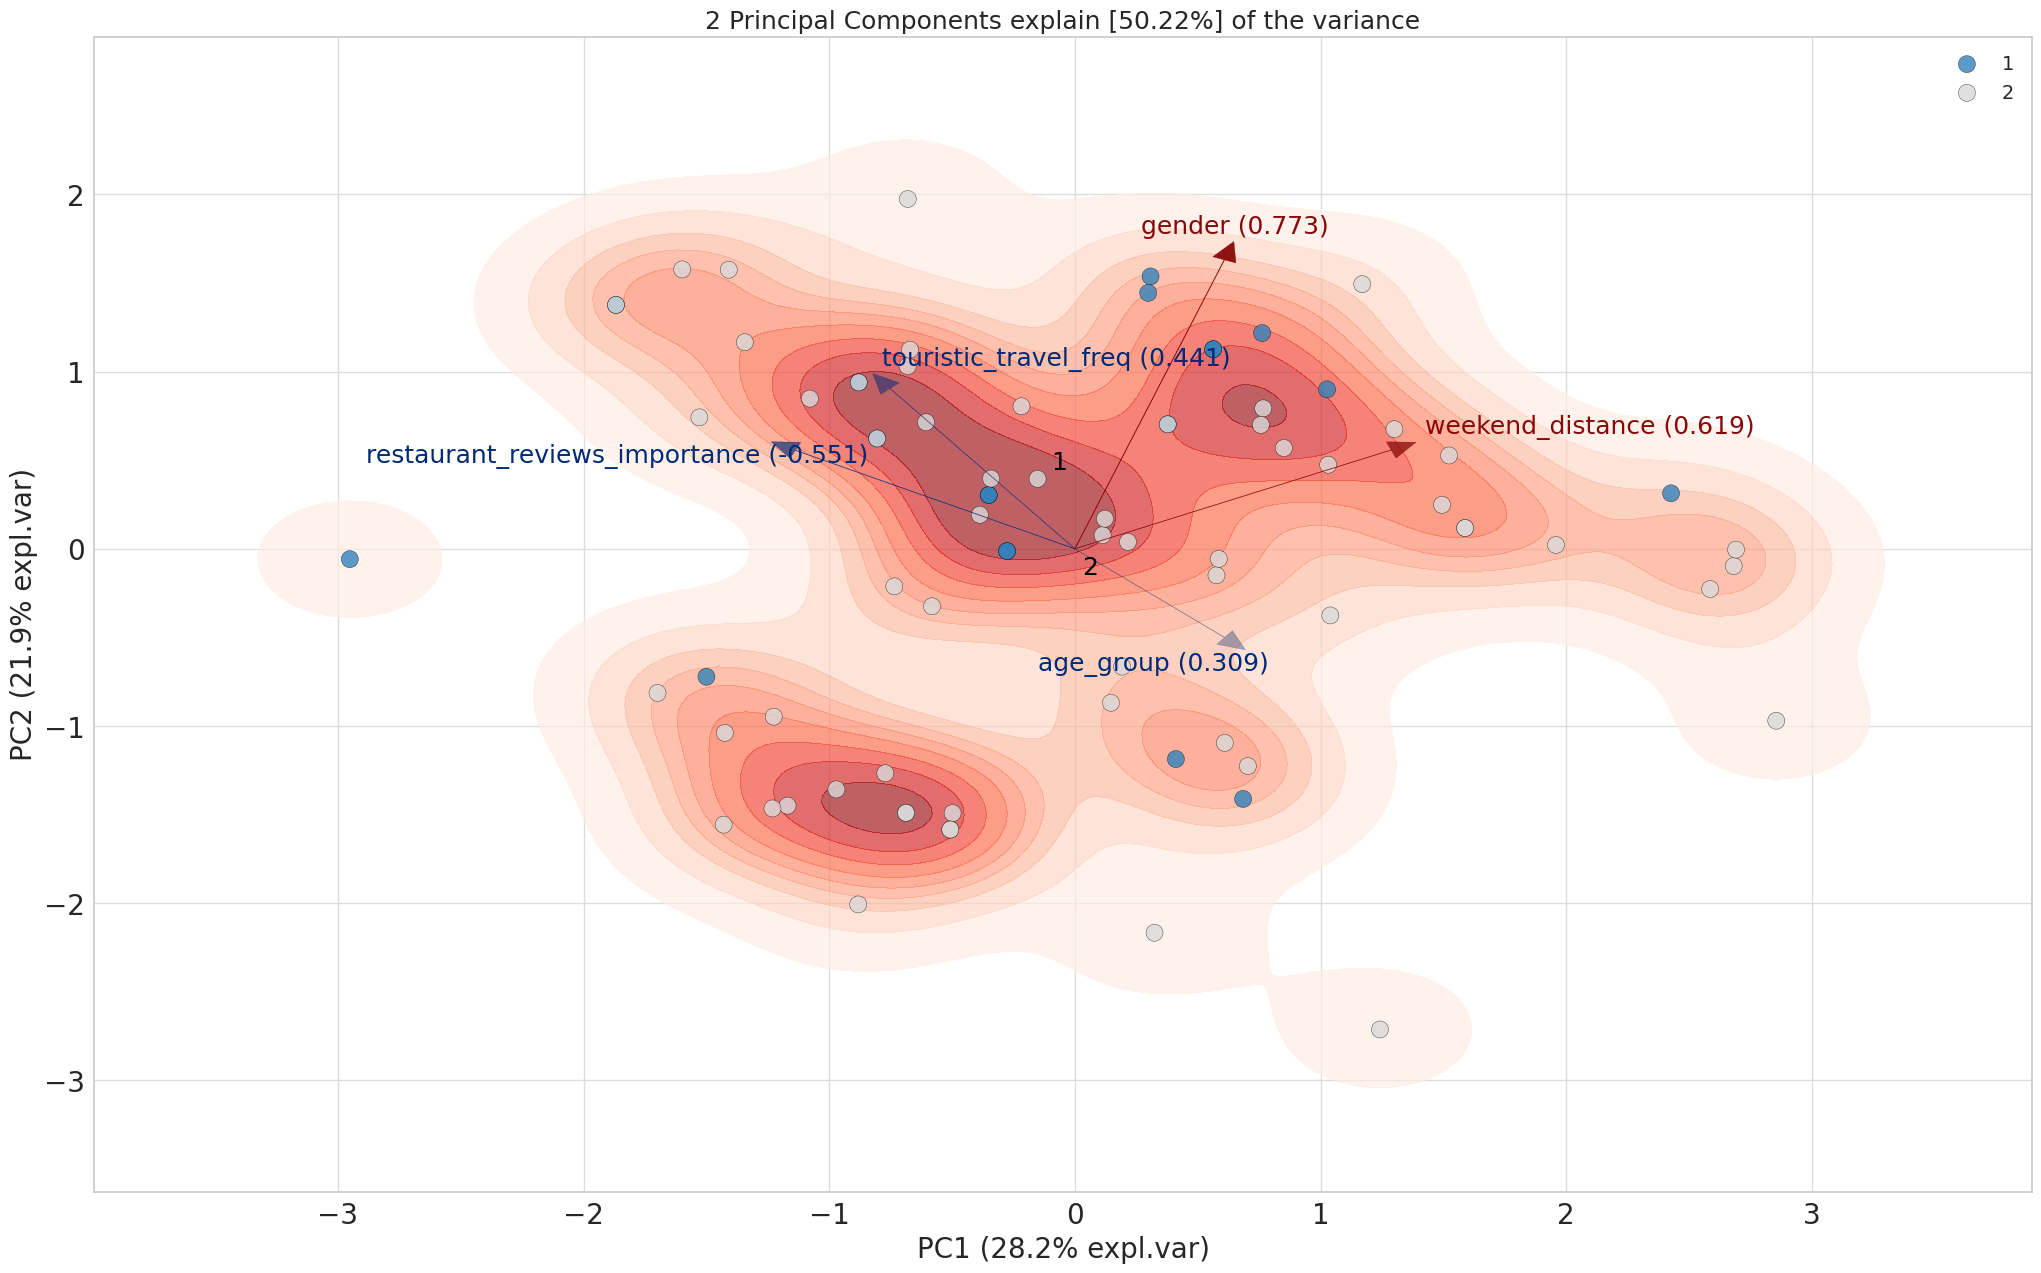

In [50]:
logging.disable(sys.maxsize)

#https://erdogant.github.io/pca
from pca import pca
model = pca(n_components=2,normalize=True)

features = df_descriptor_filtered.drop(columns="SegmentKM")
segments = df_descriptor_filtered.SegmentKM

# Fit transform
results = model.fit_transform(features,verbose=False)
# Make biplot with the number of features
# Strenght of the loadings are shown in two colors (red=strong, blue=weak)
fig, ax = model.biplot(labels=segments,verbose=0,density=True);

In [51]:
n_respondents = df_descriptor_filtered[['age_group', 'SegmentKM']].groupby('SegmentKM').count()
n_respondents = n_respondents.rename(columns={'age_group': 'Count'})
n_respondents['Size'] = round(n_respondents['Count']/n_respondents['Count'].sum()*100,2)
n_respondents

Count   Size
SegmentKM              
1             19  24.05
2             60  75.95

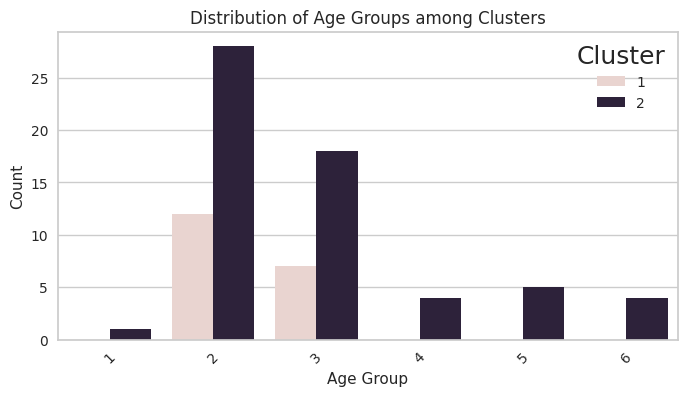

In [52]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='age_group', hue='SegmentKM')
plt.title('Distribution of Age Groups among Clusters')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

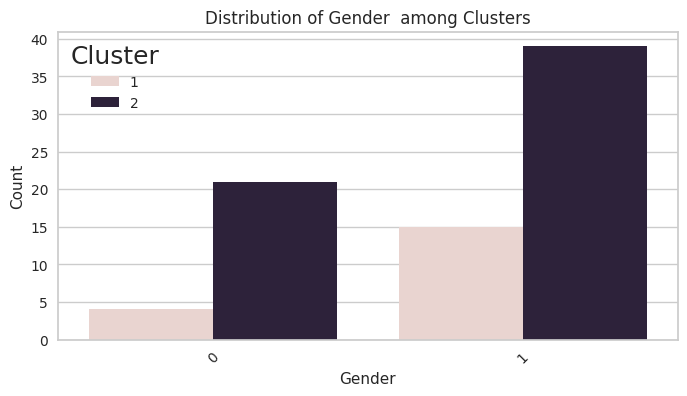

In [53]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='gender', hue='SegmentKM')
plt.title('Distribution of Gender  among Clusters')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

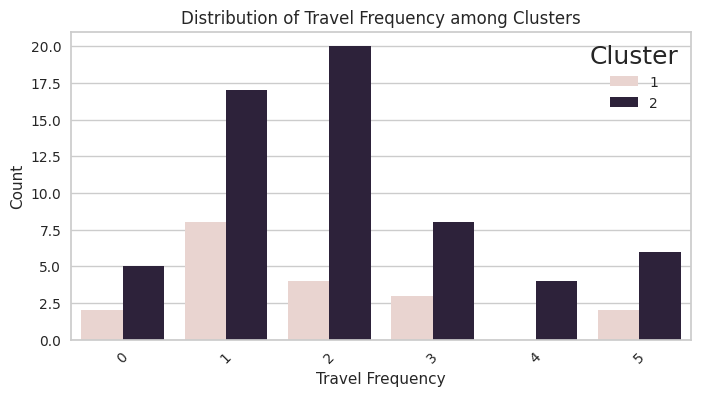

In [54]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='touristic_travel_freq', hue='SegmentKM')
plt.title('Distribution of Travel Frequency among Clusters')
plt.xlabel('Travel Frequency')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

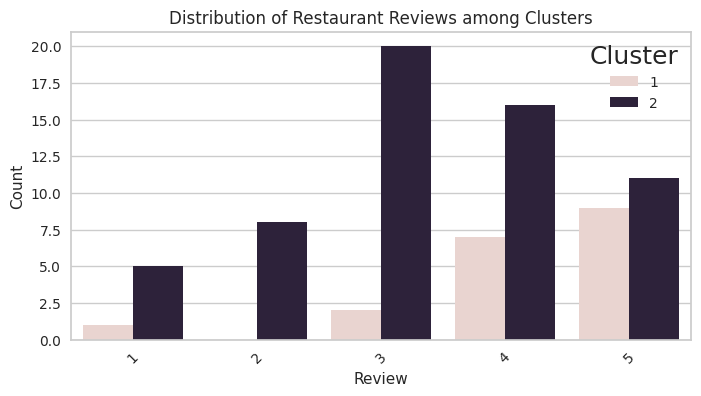

In [55]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='restaurant_reviews_importance', hue='SegmentKM')
plt.title('Distribution of Restaurant Reviews among Clusters')
plt.xlabel('Review')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

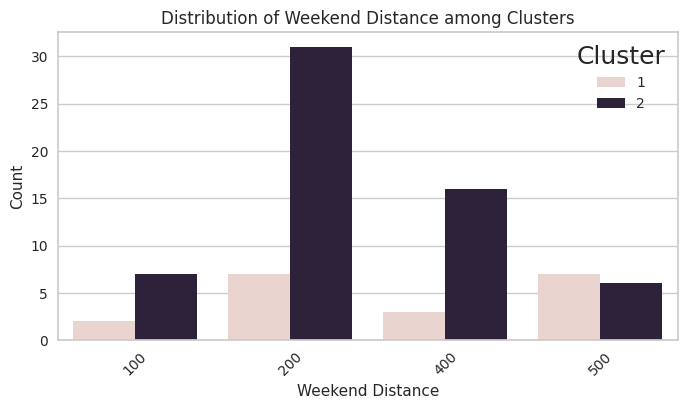

In [56]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='weekend_distance', hue='SegmentKM')
plt.title('Distribution of Weekend Distance among Clusters')
plt.xlabel('Weekend Distance')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

### Means of Descriptors Across Clusters + Descriptors Importance in each Cluster

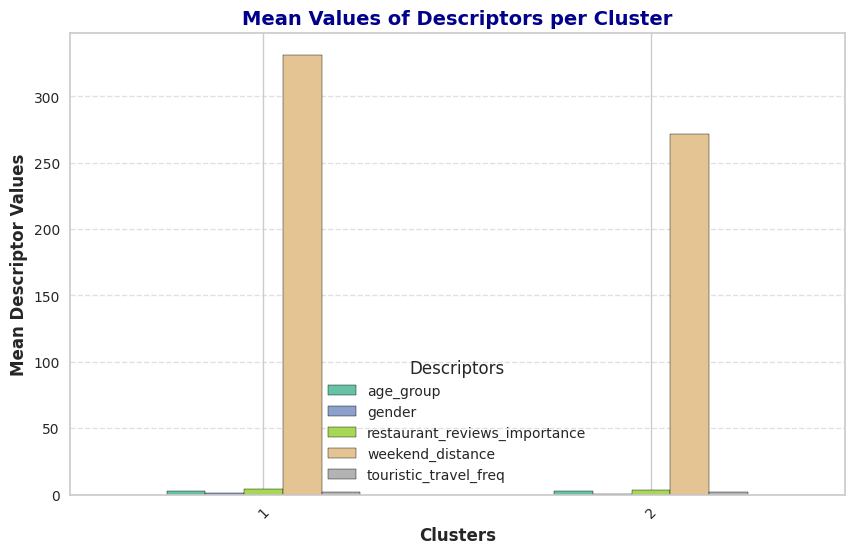

In [57]:
descriptors = ['age_group', 'gender', 'restaurant_reviews_importance', 'weekend_distance', 'touristic_travel_freq']

# Compute mean
mean_values = df_descriptor_filtered.groupby("SegmentKM")[descriptors].mean()

# Plot 
fig, ax = plt.subplots(figsize=(10, 6))
mean_values.plot(kind='bar', colormap="Set2", ax=ax, edgecolor='black')

ax.set_xlabel("Clusters", fontsize=12, fontweight='bold')
ax.set_ylabel("Mean Descriptor Values", fontsize=12, fontweight='bold')
ax.set_title("Mean Values of Descriptors per Cluster", fontsize=14, fontweight='bold', color='darkblue')

# Display legend
plt.legend(title="Descriptors", fontsize=10, title_fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Normalize cluster means for comparison
normalized_means = mean_values.div(mean_values.sum(axis=1), axis=0)

As we see a high value of weekend_distance, we will check the same plot without it, so we can have clear patterns for the other variables:

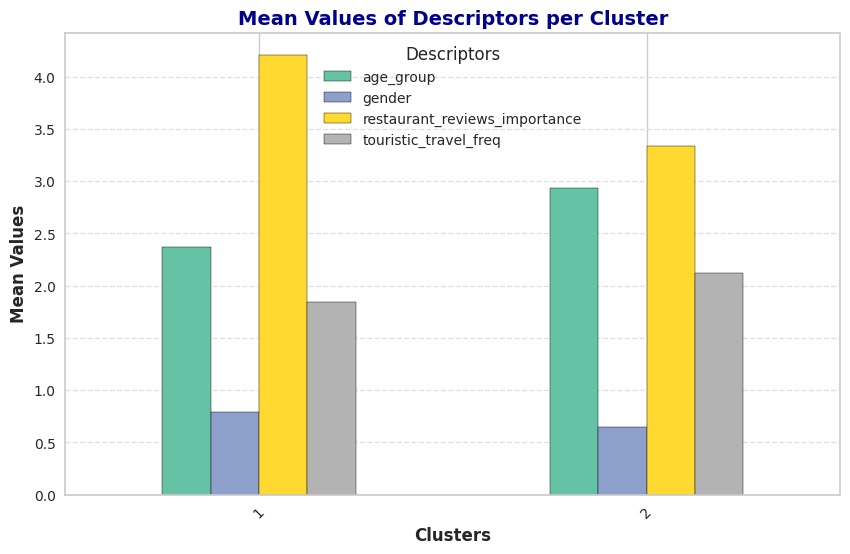

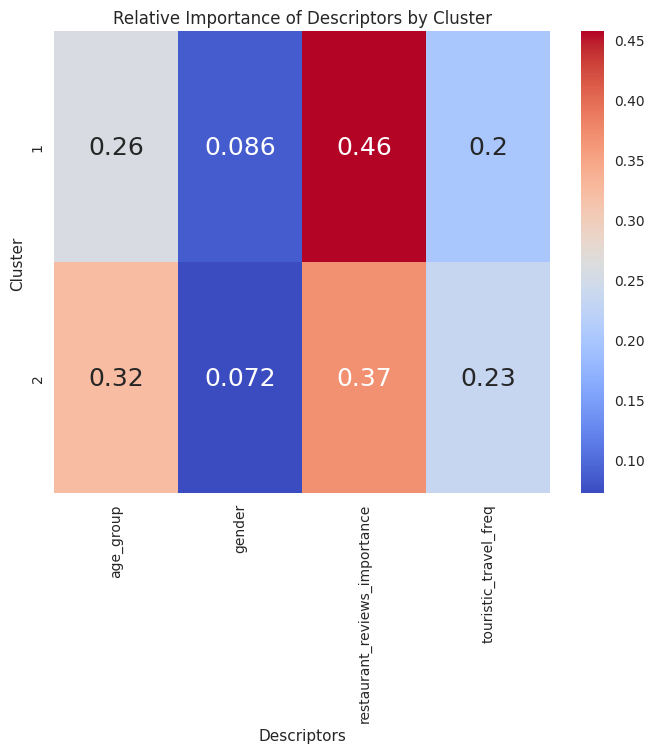

In [58]:
descriptors1 = ['age_group', 'gender', 'restaurant_reviews_importance', 'touristic_travel_freq']

# Compute mean
mean_values = df_descriptor_filtered.groupby("SegmentKM")[descriptors1].mean()

# Plot 
fig, ax = plt.subplots(figsize=(10, 6))
mean_values.plot(kind='bar', colormap="Set2", ax=ax, edgecolor='black')

ax.set_xlabel("Clusters", fontsize=12, fontweight='bold')
ax.set_ylabel("Mean Values", fontsize=12, fontweight='bold')
ax.set_title("Mean Values of Descriptors per Cluster", fontsize=14, fontweight='bold', color='darkblue')

# Display legend
plt.legend(title="Descriptors", fontsize=10, title_fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Normalize cluster means for comparison
normalized_means = mean_values.div(mean_values.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_means, annot=True, cmap='coolwarm', cbar=True)
plt.title('Relative Importance of Descriptors by Cluster')
plt.xlabel('Descriptors')
plt.ylabel('Cluster')
plt.show()

Let's refresh what the values represent, so we can understand the final values for each cluster:

* **age_group:** <18 = 1, 18-25 = 2, 26-35 = 3, 36-45 = 4, 46-55 = 5, >55 = 6.
* **gender:** male = 1, female = 0.
* **restaurant_reviews_importance:** values go from 1 to 5.
* **touristic_travel_freq:** go from 0 to 4, and 5 represents any number equal or higher than 5.
* **weekend_distance:** < 100 km (Approx. 1 hour or less by car) = 100, 100–300 km (Approx. 1.5 to 3 hours by car) = 200, 300–500 km (Approx. 3 to 5 hours by car) = 400, > 500 km ( > 5 hours by car) = 500.

**1. DIFFERENCE IN AGE GROUP:**
- Cluster 2 has a higher mean age group value than Cluster 1, suggesting that Cluster 2 might include older individuals on average.
- We can say that on average the **Cluster 1** contains respondents between **18 and 25 years old**, while **Cluster 2** contains respondents between **26 and 35 years old**. Also we must remember that Cluster 2 contains respondents older than 35 years old.

**2. GENDER DISTRIBUTION:** Both clusters have **more males than females** and when we compare the mean values we can confirm that there are no hughe differences.

**3. RESTAURANT REVIEW IMPORTANCE:**
- **Cluster 1 has a higher mean value** for restaurant review importance than the Cluster 2, indicating that it's a good variable to consider. This suggests that individuals in Cluster 1 are more likely to **rely on reviews when deciding on dining options**.
- When checking frequency by value given in the review, we can see that **Cluster 2** also have some high values for this variable, but there were more respondents answering 3, while **Cluster 1** has more values like 4 or 5.

**4. FREQUENCY OF TURISTIC TRAVEL:** **Cluster 2** shows a **higher mean value** for this variable. When looking to the frequency count we can conclude that most respondents in **Cluster 2** tend to travel **2 times a year**, while **Cluster 1** has more respondents that **travel once a year**.

**5. WEEKEND DISTANCE:** We can see that **Cluster 2** tend to prefer less distance for traveling, having a lower mean value and having more respondents preferring to **travel at most between 100 and 300 km for a weekend**. On the other hand, **Cluster 1** has no clear preference, although we can say that we have **some respondents that coincide with that majority in cluster 2**, while other respondents **would travel more than 500km** for a weekend trip.ng move.

## Predictive Model with Descriptors

Classification using Multinomial Logit model (from statsmodel package)


In [59]:
import statsmodels.formula.api as smf

smf.mnlogit(formula="SegmentKM ~ age_group + gender + restaurant_reviews_importance + weekend_distance + touristic_travel_freq",
            data=df_descriptor_filtered).fit().summary()

Optimization terminated successfully.
         Current function value: 0.425147
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              SegmentKM   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       73
Method:                           MLE   Df Model:                            5
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.2293
Time:                        12:24:50   Log-Likelihood:                -33.587
converged:                       True   LL-Null:                       -43.581
Covariance Type:            nonrobust   LLR p-value:                  0.001255
=================================================================================================
                  SegmentKM=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.9165      1.809      2.165      0.030       0.371       7.462
age_group                         0.7895      0.450      1.753      0.080      -0.093       1.672
gender                           -0.5604      0.699     -0.802      0.422      -1.930       0.809
restaurant_reviews_importance    -0.8966      0.310     -2.890      0.004      -1.505      -0.289
weekend_distance                 -0.0047      0.002     -1.984      0.047      -0.009   -5.58e-05
touristic_travel_freq             0.1855      0.219      0.848      0.396      -0.243       0.614
=================================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.425147
         Iterations 7


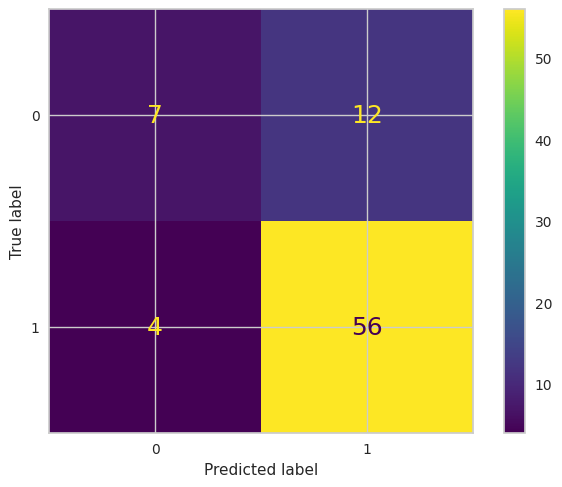

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

PredTable = smf.mnlogit(formula="SegmentKM ~ age_group + gender + restaurant_reviews_importance + weekend_distance + touristic_travel_freq",
                        data=df_descriptor_filtered).fit().pred_table()

ConfusionMatrixDisplay(confusion_matrix=PredTable).plot();

## Segmentation conclusion
After all done, we considered that the **clustering result was appropiate** and **k=2** clusters was the **best option** for the project.

Nevertheless, when trying to use **descriptive variables** for describing each cluster, the **results were not as good as expected**, having some overlapping between clusters, and some variables that do not discriminate clusters correctly. After some variable removal, the model outputed a **good prediciton accuracy of 79,7%** and a **loss function value of 42,5%**. We can see that the **model can still improve**.

This said, we consider that **attributes are well selected**, although a further analysis could be done to determine if it can be improved with other attributes.

On the other hand, we highly recommend **improving the descriptive variables**, and improve **model to do a good prediction** with them. Probably some variables that could have been better and improve the model are: **income, professional status, marital status, family composition, among others**.

### Cluster 1
Consists mainly of **_younger individuals_**, typically between **_18 and 25 years old_**. This group places **_greater importance on restaurant reviews_**, indicating that they are more likely to **_rely on others' opinions_** before deciding on dining options. While they do **_travel, they tend to do so less frequently:_**, with most respondents traveling only **_once a year for tourism_**. When it comes to weekend trips, there is no strong preference for travel distance, but **_some are willing to travel more than 500 km_**, suggesting a **_mix of both local and long-distance travelers_**.

**_STRATEGY:_** focusing on social media engagement, affordable travel options, and unique experiences. Partnering with influencers and travel bloggers on TikTok and Instagram can help highlighting exciting activities, while encouraging visitors to leave positive online reviews, increasing credibility. The city should promote budget-friendly hostels and student discounts as in general we are talking about young people. Creating weekend travel packages, mainly with neighbour cities, so they can visit more than one city in a weekend or week, providing diverse and exciting trips.

### Cluster 2
Comprises an **_older demographic_**, primarily **_between 26 and 35 years old_**, though it also includes respondents over 35. Compared to Cluster 1, these individuals **_travel more frequently_**, with most respondents taking at least two tourist trips per year. They show less reliance on restaurant reviews when choosing dining options but still have a portion of respondents considering them. For weekend trips, **_they prefer shorter travel distances_**, with most choosing to travel **_between 100 and 300 km_**, indicating a tendency for nearby getaways rather than long-distance weekend travel.

**_STRATEGY:_** for this cluster is important to provide convenience, relaxation, and premium experiences. The city should aim for weekend getaway packages that include hotels, fine dining, and guided cultural tours. Given their preference for shorter distances, targeted campaigns should focus on regional visitors. Taking into account these, Ascoli Piceno should improve the accesibility to the city, so tourists can arrive from different parts of Italy and even the world. Partnerships with corporate offices and travel agencies can help, as in general they won't travel too much for a quick escape, so a whole Ascoli Piceno experience should be provided. Promoting wine tastings, historical attractions, and boutique accommodations will further appeal to this segment. Lastly, a loyalty program or exclusive weekend pass offering discounts for multiple visits will encourage repeat tourism and build long-term engagement with this group.

# Positioning

## General Positioning

In [61]:
df_positioning = df_ascoli

### Data Distribution

The first step involves understanding the data distribution, with a particular focus on the columns relevant to the positioning analysis, specifically those containing comparisons between the selected cities. We acknowledge that the small sample size limits our ability to draw robust conclusions regarding the validity of these distributions. Nevertheless, we can confirm that there are no significant outliers that might compromise the integrity of the data distribution. Therefore, we will proceed by considering the mean as the primary metric, rather than the median.

In [63]:
pd.set_option('display.max_columns', None)
print(df_positioning.describe())

columns_of_interest = [
    "rating_ascoli", "rating_siena", "rating_lucca", "rating_pisa", "rating_venezia",
    "food_ascoli", "food_siena", "food_lucca", "food_pisa", "food_venezia",
    "events_ascoli", "events_siena", "events_lucca", "events_pisa", "events_venezia"
]


differences = []

for column in columns_of_interest:
    if column in df.columns:
        diff = abs(df_positioning[column].mean() - df_positioning[column].median())
        differences.append(diff)


np.mean(differences)

       age_group     gender  touristic_travel_freq  weekend_distance  \
count  79.000000  79.000000              79.000000         79.000000   
mean    2.797468   0.683544               2.050633        286.075949   
std     1.136569   0.468065               1.395035        135.622191   
min     1.000000   0.000000               0.000000        100.000000   
25%     2.000000   0.000000               1.000000        200.000000   
50%     2.000000   1.000000               2.000000        200.000000   
75%     3.000000   1.000000               3.000000        400.000000   
max     6.000000   1.000000               5.000000        500.000000   

       historic_importance  restaurant_reviews_importance  \
count            79.000000                      79.000000   
mean              3.392405                       3.544304   
std               1.148217                       1.196121   
min               1.000000                       1.000000   
25%               3.000000                    

NameError: name 'df' is not defined

### Perceptual Data

The next step is to create **perceptual data** using the various ratings available.
Ascoli Piceno will be compared to four other cities:

**Siena**:
Siena shares a notable cultural similarity with Ascoli Piceno due to their traditional and historic events, such as the Quintana in Ascoli Piceno and the Palio in Siena. Both cities leverage these events to attract tourists, making the comparison valuable for understanding positioning strategies related to cultural tourism and event-based marketing.

**Lucca**:
Both Ascoli Piceno and Lucca are small-sized cities known for their well-preserved historical centers and architectural heritage. Their medieval cityscapes, complete with narrow streets, ancient walls, and a strong sense of identity, make them ideal for analyzing how smaller cities promote themselves as destinations for cultural and heritage tourism.

**Pisa**:
Pisa, despite being more internationally recognized due to its iconic Leaning Tower, provides an interesting comparison in terms of leveraging historical landmarks to attract visitors. Comparing Ascoli Piceno to Pisa highlights differences in marketing strategies between a globally recognized destination and a lesser-known but equally rich historical city.

**Venice**:
Venice offers a unique counterpoint to Ascoli Piceno, being one of the most famous tourist destinations in the world. This comparison allows us to explore how a smaller, less globally renowned city like Ascoli Piceno can differentiate itself by emphasizing exclusivity, authenticity, and a less commercialized experience compared to Venice’s large-scale tourism model.

In [ ]:
regions = ["Ascoli Piceno", "Siena", "Lucca", "Pisa", "Venezia"]
categories = ["rating", "food", "events"]

region_column_map = {
    "Ascoli Piceno": "ascoli",
    "Siena": "siena",
    "Lucca": "lucca",
    "Pisa": "pisa",
    "Venezia": "venezia"
}


transformed_data = {}

for region, suffix in region_column_map.items():
    row = {}
    for category in categories:
        col_name = f"{category}_{suffix}"
        row[category] = 6 - df_positioning[col_name].mean()
    transformed_data[region] = row


final_df = pd.DataFrame.from_dict(transformed_data, orient="index").reset_index()
final_df.rename(columns={"index": "Region"}, inplace=True)

In [ ]:
final_df

The perceptual data consist of three main categories used to compare the selected cities, with ratings ranging from a minimum of 1 (*low value*) to a maximum of 5 (*high value*).

*  The **rating** column reflects the perceived value of each city’s historical and cultural experiences.
*  The **food** column evaluates the perceived value of local cuisine based on a representative dish selected for each city.
*  The **events** column measures the perceived value of local festivals and events, considering a flagship event for each city.

However, these three macro-categories may not provide sufficient insights to clearly distinguish the differences and potential of each city. For this reason, we have also relied on external data beyond the survey results. Specifically, we incorporated data from ***AirDNA***, one of the largest platforms for housing market analytics, to gather estimates on the average price of short-term rental properties (*average price per night*) and the *number of available properties*.

These data will be integrated into the analysis to provide a quantitative comparison of the differences in appeal and scale among the cities under consideration.

In [ ]:
price_data = {
    'Region': ['Venezia', 'Pisa', 'Siena', 'Lucca', 'Ascoli Piceno'],
    'Average Price per Night': [234.98, 118.30, 167.58, 219.52, 96.69]
}


listings_data = {
    'Region': ['Venezia', 'Pisa', 'Siena', 'Lucca', 'Ascoli Piceno'],
    'Number of Listings': [7462,1132, 1110, 1599, 102]
}


df_price = pd.DataFrame(price_data)
df_listings = pd.DataFrame(listings_data)


final_df = final_df.merge(df_price, on='Region', how='left')
final_df = final_df.merge(df_listings, on='Region', how='left')

In [64]:
final_df

NameError: name 'final_df' is not defined

### Data Analysis and Marketing Strategies

#### Spider Chart

In this section, we will analyze a **spider chart** that provides a comparative overview of the five cities across the three key perceptual categories.
The spider chart serves as a powerful tool to visually identify strengths, weaknesses, and patterns in the perception of these cities.

**Venice** clearly stands out with the **highest historical and cultural rating** and a **strong performance** in **events**, suggesting it excels in overall appeal and its ability to host or promote activities. However, its **low score** in the **food** category is striking. This indicates that while visitors might enjoy the cultural or social aspects of Venezia, its culinary offerings might not meet expectations, leaving room for improvement.

**Lucca**, on the other hand, is a **food** lover's paradise, with an **exceptional score** in this category, surpassing all other cities. Despite this strength, its **historical and cultural ratings** are comparatively **modest**, and its performance in **events** is **less impressive**. This paints a picture of a city that attracts visitors primarily for its cuisine but might lack in other areas that could enhance the overall experience.

**Pisa** seems to offer a **balanced experience**, performing well in historical and cultural rating and maintaining a decent standing in food and events. Its relatively high rating suggests a generally positive perception, though it does not excel in any particular area. **Siena** follows a **similar trend**, offering a consistently good performance across all metrics without dominating in any single category. This consistency makes it a well-rounded destination, appealing to a broader audience.

**Ascoli Piceno** shares similarities with Siena in its **strong** showing for **food** and **events**, but it **lags slightly in historical and cultural rating**. This suggests that while it offers quality in specific areas, the overall perception of the city might not be as strong. Enhancing the visitor experience or addressing specific weaknesses could help elevate its appeal.

In [65]:
categories = ["rating", "food", "events"]
num_vars = len(categories)


values = final_df[categories].values
values = np.concatenate([values, values[:, [0]]], axis=1)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in final_df.iterrows():
    ax.plot(angles, values[i], label=row["Region"])
    ax.fill(angles, values[i], alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_title("Region Comparison Across Metrics", size=16, weight="bold")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

NameError: name 'final_df' is not defined

#### Overlay Plot

The **overlay bar plot** allows for a **comparison** between the **relationship** of the **average price per night** in different cities and the **number of available listings**. Intuitively, it can be hypothesized that a higher number of listings may be influenced by an increased demand for accommodation. In simpler terms, the higher the demand for housing, the greater the investments and offerings in that particular area.

The plot below clearly **illustrates** the **correlation** between the number of listings and the average price per night, showing how these two variables are interconnected.

In addition to confirming the outlier value for **Venice**, **Lucca** presents an intriguing perspective. It demonstrates a significant deviation both in terms of the number of listings and the average price, surpassing other cities by a considerable margin. This can be attributed, for instance, to the presence of well-known events such as the Lucca Summer Festival, which attracts substantial tourism during a period of the year when people tend to travel more.

Similarly, **Siena** offers valuable insights, especially in the context of our analysis of Ascoli Piceno. Siena ranks as the third city, surpassing even major tourist destinations like **Pisa** by a notable margin. The popularity of events like the Palio undoubtedly plays a key role in this, highlighting how focusing on the promotion and enhancement of similar events—such as the Quintana in **Ascoli Piceno**—could potentially make the city's position much more attractive than what is currently depicted in this graph.

In [ ]:
x = np.arange(len(final_df["Region"]))
width = 0.4

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(x - width/2, final_df["Number of Listings"], width, label="Number of Listings", color="skyblue")
ax1.set_ylabel("Number of Listings", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")

ax2 = ax1.twinx()
ax2.bar(x + width/2, final_df["Average Price per Night"], width, label="Avg Price/Night", color="orange")
ax2.set_ylabel("Average Price per Night (€)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

ax1.set_xticks(x)
ax1.set_xticklabels(final_df["Region"])
ax1.set_title("Overlay of Listings and Price per Night by Region", size=16, weight="bold")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

#### Correlation Matrix

Below is a **correlation matrix** based on perceptual data. Naturally, the perceptual data do not provide a **sufficiently large dataset** to draw **definitive conclusions**. However, there are several relevant insights from which we can derive meaningful observations:

*  **Average Price per Night and Rating**: A moderate positive correlation of 0.437 between "average price per night" and "rating" indicates that, in general, **cities with higher rating** tend to have **slightly higher prices per night**. This result is intuitive, as cities with higher historical and cultural appeal often attract greater tourism demand, driving up rental prices.

*  **Number of Listings and Rating**: The strong positive correlation of 0.897 between "number of listings" and "rating" reveals a significant relationship between the two variables. This suggests that areas with a higher number of listings typically have higher ratings, which could imply that these **areas are more competitive**, since the higher demand pushes the offer to rise as well.

*  **Average Price per Night and Listings**: The moderate correlation of 0.735 between "average price per night" and "number of listings" confirms the previous analysis that areas with **higher rental prices** tend to have **more listings**. This can be attributed to the increased demand in such areas, leading to more accommodations being available to meet the needs of visitors.

*  **Number of Listings and Events**: A positive correlation of 0.713 between "number of listings" and "events" suggests that areas with **popular events** generally have a **higher number of listings**. This is in line with the assumption that areas with more attractions or events draw in more visitors, thus creating a higher demand for listings to accommodate the influx of tourists.

In [ ]:
numeric_columns = ["rating", "food", "events", "Average Price per Night", "Number of Listings"]
corr = final_df[numeric_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", size=16, weight="bold")
plt.show()

#### PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that helps us to **simplify the dataset** while **retaining the most important variance** in the data. In this analysis, PCA was applied to the features present in our original dataset. Before applying PCA, the data was standardized using `StandardScaler` to ensure that each feature had a mean of zero and a standard deviation of one, which is a common preprocessing step for PCA.

The explained variance ratio indicates how much of the total variance in the data is captured by each principal component. For this analysis, the variance explained by the first and second principal components is:

* **Principal Component 1**: 0.73
* **Principal Component 2**: 0.19

This suggests that the first component captures 73% of the variance in the data, while the second component captures 19%. Together, these two components explain **92%** of the **total variance** in the data, which shows that the dimensionality reduction was successful in preserving most of the information.

In [66]:
data_for_pca = final_df[["rating", "food", "events", "Average Price per Night", "Number of Listings"]]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca_model = pca(n_components=2, verbose=0)
pca_components = pca_model.fit_transform(data_scaled, col_labels = final_df.columns)

explained_variance = pca_components['variance_ratio']
print(f"Explained variance by component 1: {explained_variance[0]:.2f}")
print(f"Explained variance by component 2: {explained_variance[1]:.2f}")

NameError: name 'final_df' is not defined

In [ ]:
final_df["PCA1"] = pca_components['PC']['PC1'].values
final_df["PCA2"] = pca_components['PC']['PC2'].values

In [67]:
final_df

NameError: name 'final_df' is not defined

#### Positioning Map

The first plot generated is the **Positioning Map**. This plot visualizes the positioning of different cities based on the two principal components. Each city is represented by a different color, and the scatter points correspond to the transformed coordinates of the original data in the new principal component space. This allows us to visually observe how the cities cluster and how they differ based on the features analyzed.

Cities that are closer together in this space share similar characteristics in terms of the rating, food quality, events, price, and listings. Conversely, cities that are further apart have more distinct differences in these attributes.

In [68]:
plt.figure(figsize=(10, 8))

for region in final_df["Region"].unique():
    subset = final_df[final_df["Region"] == region]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=region, s=100)

for i, row in final_df.iterrows():
    plt.text(row["PCA1"], row["PCA2"], row["Region"], fontsize=9, ha="right", va="bottom")


plt.title("Positioning Map (PCA)", fontsize=16, weight="bold")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(0, color="grey", linestyle="--", linewidth=0.7)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.7)
plt.grid(alpha=0.3)

plt.legend(loc="best", title="Regions", fontsize=10)

plt.tight_layout()
plt.show()

NameError: name 'final_df' is not defined

<Figure size 1000x800 with 0 Axes>

#### PCA Biplot

The second plot is the **PCA Biplot**, which provides a deeper understanding of the **relationship** between the **original variables** (rating, food, events, price, and listings) and the **principal components**. The red arrows represent the loadings of the original variables on the principal components. A loading indicates the contribution of each original variable to the principal components.

From the biplot, we can infer the following:

* **PC1** seems to be most influenced by "**average price per night**", "**number of listings**","**events**", and "**rating**".
The strong positive direction of these loadings suggests that cities with high scores on PC1 are characterized by high average prices for nightly rentals, a large number of listings, and the perceived value of events and historical and cultural heritage.
* **PC2** appears to be predominantly influenced by "**food**", which has the strongest positive loading along this axis.
Cities scoring higher on PC2 are likely to be distinguished by their culinary offerings, making PC2 indicative of gastronomic value.

The biplot not only shows how cities are positioned but also reveals the variables that are driving this positioning. Cities with a higher value for a specific variable (e.g., "events") will be positioned further along the axis corresponding to that variable's loadings.

In [69]:
pca_components['loadings'].columns = ['rating', 'food', 'events', 'Average Price per Night', 'Number of Listings']
pca_components['topfeat']['feature'] = [final_df.columns[int(i)] for i in pca_components['topfeat']['feature']]
pca_components

NameError: name 'pca_components' is not defined

In [70]:
fig, ax = pca_model.biplot(verbose=0)

coord = pca_components["PC"]

for i, txt in enumerate(final_df['Region']):
    ax.text(coord.loc[i, "PC1"] + 0.05, coord.loc[i, "PC2"], txt, fontsize=28)

NameError: name 'pca_model' is not defined

### Positioning and Strategic Opportunities for Ascoli Piceno
From the two maps, we can infer the positioning of various cities in the space and draw several insights:

* **Venice** confirms its status as an **outlier**. Since PC1 is heavily influenced by attributes such as historical-cultural value, nightly rental prices, and the number of listings, it is no surprise that Venice stands out significantly from any other city, excelling in each of these attributes.

* Another interesting case is **Lucca**, which is also **markedly distanced** from its **competitors**. This city greatly benefits from its advantage in average rental prices and food offerings. These strengths allow Lucca to distinguish itself from the other cities.

* Finally, there is a **third cluster** comprising **Ascoli Piceno**, **Pisa**, and **Siena**, with the latter slightly distanced. Ascoli Piceno appears to have fewer strengths compared to the other two cities, which leverage greater historical-cultural appeal (Pisa) and the high perceived value of popular events (Siena) to build a more or less significant advantage.

### Opportunities for Ascoli Piceno
The **perceived value** of **Ascoli Piceno** compared to other cities certainly shows **signs of weakness**. However, there are **excellent starting points** that can be developed to help Ascoli Piceno stand out from its competitors and create its unique strengths. The city has a strong foundation in terms of its **food offerings**. Alongside Lucca and Siena, Ascoli Piceno ranks among the most appreciated cities in this regard.

With a rich culinary heritage that includes renowned dishes such as *olive all’ascolana*, Ascoli has the opportunity to establish itself as a premier gastronomic destination. Hosting **food festivals** that celebrate the city’s traditional recipes and local produce can attract both domestic and international visitors. Additionally, **guided culinary tours** that include visits to local restaurants, wineries, and producers can offer an intimate exploration of the region's flavors, creating memorable experiences that tourists will share with others. Finally, leveraging renowned chefs and influencers could be an effective way to use **digital marketing** as a powerful tool to reach a wide audience and showcase the city's strengths.

Another opportunity to leverage is the *Quintana Festival*. The Quintana offers Ascoli Piceno a platform to rival Siena’s Palio in attracting culturally motivated tourists. While Siena is globally recognized for its *Palio*, the Quintana holds **untapped potential **to become a **similarly iconic event**. Enhancing the festival experience with **historical reenactments**, **interactive workshops**, and **thematic markets** can help Ascoli build a more immersive narrative around its medieval heritage. Modern marketing approaches, such as **digital storytelling**, influencer partnerships, and live-streamed content, can extend the festival’s reach and generate excitement among younger audiences. Developing **partnerships with travel agencies** to offer event-specific packages will further ensure that the Quintana becomes a centerpiece of regional tourism.

Focusing on Ascoli Piceno's strengths relative to competitors who are already ahead would allow the city to differentiate itself, create a **competitive advantage**, and leverage competition with more popular events to promote its own and grow. Moreover, growth in these areas would indirectly improve other attributes, as the city would gain **visibility** and **popularity**.

## Positioning by Cluster

For this part, we are going to compare the **general positioning** to **positioning by clusters**.

In [71]:
df_ascoli["SegmentKM"] = df_attributes["SegmentKM"]

In [72]:
df_cluster1 = df_ascoli[df_ascoli['SegmentKM'] == 1]
df_cluster2 = df_ascoli[df_ascoli['SegmentKM'] == 2]

### Cluster 1

#### Perceptual Data

In [73]:
regions = ["Ascoli Piceno", "Siena", "Lucca", "Pisa", "Venezia"]
categories = ["rating", "food", "events"]

region_column_map = {
    "Ascoli Piceno": "ascoli",
    "Siena": "siena",
    "Lucca": "lucca",
    "Pisa": "pisa",
    "Venezia": "venezia"
}


transformed_data = {}

for region, suffix in region_column_map.items():
    row = {}
    for category in categories:
        col_name = f"{category}_{suffix}"
        row[category] = 6 - df_cluster1[col_name].mean()
    transformed_data[region] = row


final_df_cluster1 = pd.DataFrame.from_dict(transformed_data, orient="index").reset_index()
final_df_cluster1.rename(columns={"index": "Region"}, inplace=True)

In [74]:
final_df_cluster1

Region    rating      food    events
0  Ascoli Piceno  2.842105  3.105263  3.684211
1          Siena  3.263158  3.000000  3.210526
2          Lucca  2.947368  3.526316  2.684211
3           Pisa  3.000000  2.842105  2.842105
4        Venezia  2.947368  2.526316  2.578947

In [75]:
price_data = {
    'Region': ['Venezia', 'Pisa', 'Siena', 'Lucca', 'Ascoli Piceno'],
    'Average Price per Night': [234.98, 118.30, 167.58, 219.52, 96.69]
}


listings_data = {
    'Region': ['Venezia', 'Pisa', 'Siena', 'Lucca', 'Ascoli Piceno'],
    'Number of Listings': [7462,1132, 1110, 1599, 102]
}


df_price = pd.DataFrame(price_data)
df_listings = pd.DataFrame(listings_data)


final_df_cluster1 = final_df_cluster1.merge(df_price, on='Region', how='left')
final_df_cluster1 = final_df_cluster1.merge(df_listings, on='Region', how='left')

In [76]:
final_df_cluster1

Region    rating      food    events  Average Price per Night  \
0  Ascoli Piceno  2.842105  3.105263  3.684211                    96.69   
1          Siena  3.263158  3.000000  3.210526                   167.58   
2          Lucca  2.947368  3.526316  2.684211                   219.52   
3           Pisa  3.000000  2.842105  2.842105                   118.30   
4        Venezia  2.947368  2.526316  2.578947                   234.98   

   Number of Listings  
0                 102  
1                1110  
2                1599  
3                1132  
4                7462

#### Spider Chart

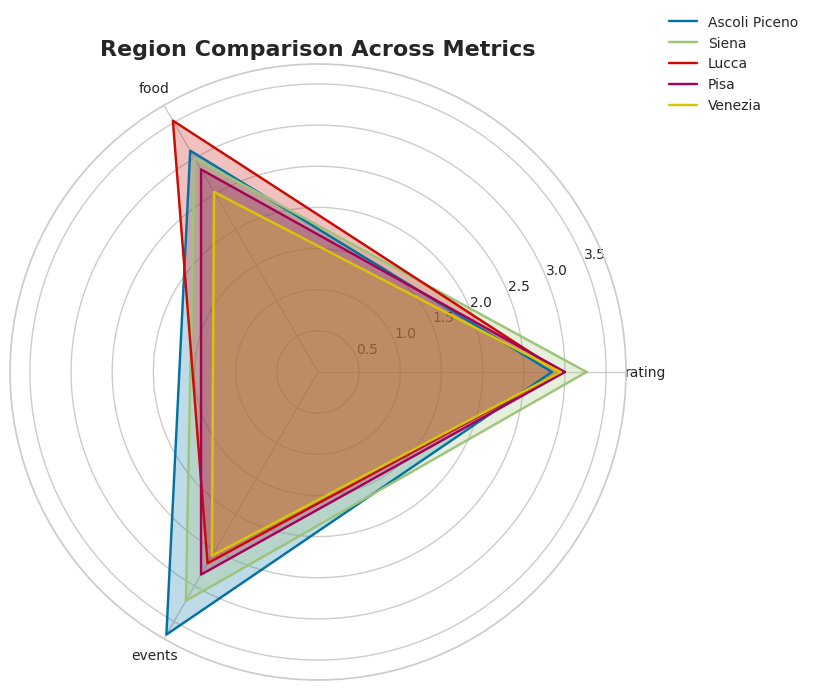

In [77]:
categories = ["rating", "food", "events"]
num_vars = len(categories)


values = final_df_cluster1[categories].values
values = np.concatenate([values, values[:, [0]]], axis=1)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in final_df_cluster1.iterrows():
    ax.plot(angles, values[i], label=row["Region"])
    ax.fill(angles, values[i], alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_title("Region Comparison Across Metrics", size=16, weight="bold")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

#### Overlay Bar Plot

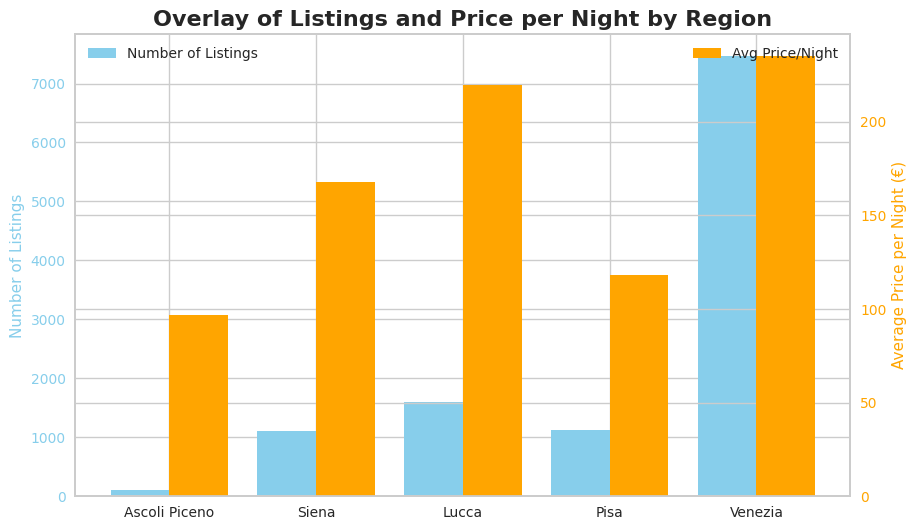

In [78]:
x = np.arange(len(final_df_cluster1["Region"]))
width = 0.4

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(x - width/2, final_df_cluster1["Number of Listings"], width, label="Number of Listings", color="skyblue")
ax1.set_ylabel("Number of Listings", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")

ax2 = ax1.twinx()
ax2.bar(x + width/2, final_df_cluster1["Average Price per Night"], width, label="Avg Price/Night", color="orange")
ax2.set_ylabel("Average Price per Night (€)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

ax1.set_xticks(x)
ax1.set_xticklabels(final_df_cluster1["Region"])
ax1.set_title("Overlay of Listings and Price per Night by Region", size=16, weight="bold")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

#### Correlation Matrix

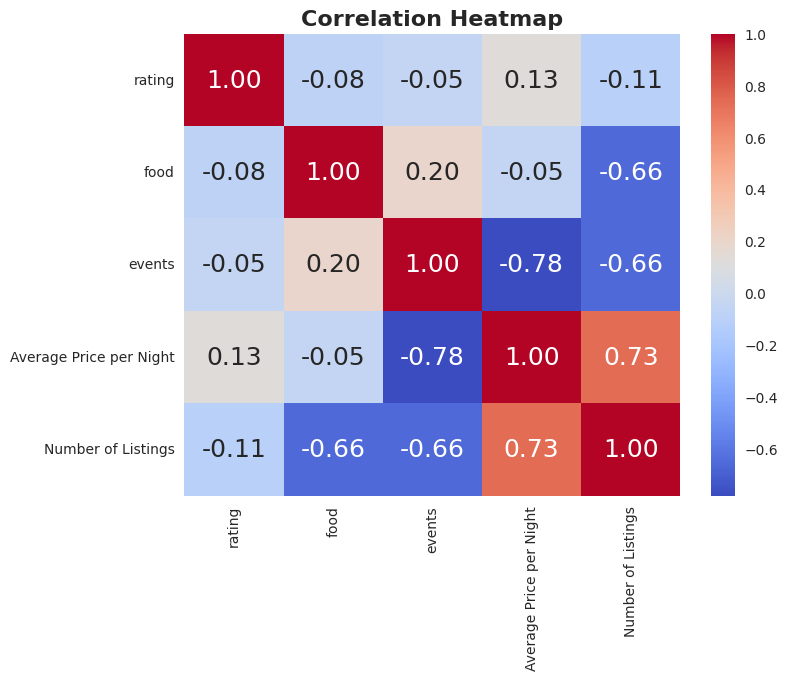

In [79]:
numeric_columns = ["rating", "food", "events", "Average Price per Night", "Number of Listings"]
corr = final_df_cluster1[numeric_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", size=16, weight="bold")
plt.show()

#### PCA

In [80]:
data_for_pca = final_df_cluster1[["rating", "food", "events", "Average Price per Night", "Number of Listings"]]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca_model = pca(n_components=2, verbose=0)
pca_components = pca_model.fit_transform(data_scaled, col_labels = final_df_cluster1.columns)

explained_variance = pca_components['variance_ratio']
print(f"Explained variance by component 1: {explained_variance[0]:.2f}")
print(f"Explained variance by component 2: {explained_variance[1]:.2f}")

Explained variance by component 1: 0.53
Explained variance by component 2: 0.22


In [81]:
final_df_cluster1["PCA1"] = pca_components['PC']['PC1'].values
final_df_cluster1["PCA2"] = pca_components['PC']['PC2'].values

In [82]:
final_df_cluster1

Region    rating      food    events  Average Price per Night  \
0  Ascoli Piceno  2.842105  3.105263  3.684211                    96.69   
1          Siena  3.263158  3.000000  3.210526                   167.58   
2          Lucca  2.947368  3.526316  2.684211                   219.52   
3           Pisa  3.000000  2.842105  2.842105                   118.30   
4        Venezia  2.947368  2.526316  2.578947                   234.98   

   Number of Listings      PCA1      PCA2  
0                 102 -2.209640 -0.997092  
1                1110 -0.466956  0.671871  
2                1599  0.248989  1.724147  
3                1132 -0.371954 -0.503735  
4                7462  2.799561 -0.895190

#### Positioning Map

In [83]:
plt.figure(figsize=(10, 8))

for region in final_df_cluster1["Region"].unique():
    subset = final_df_cluster1[final_df["Region"] == region]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=region, s=100)

for i, row in final_df_cluster1.iterrows():
    plt.text(row["PCA1"], row["PCA2"], row["Region"], fontsize=9, ha="right", va="bottom")


plt.title("Positioning Map (PCA)", fontsize=16, weight="bold")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(0, color="grey", linestyle="--", linewidth=0.7)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.7)
plt.grid(alpha=0.3)

plt.legend(loc="best", title="Regions", fontsize=10)

plt.tight_layout()
plt.show()

NameError: name 'final_df' is not defined

<Figure size 1000x800 with 0 Axes>

#### PCA Biplot

In [ ]:
pca_components['loadings'].columns = ['rating', 'food', 'events', 'Average Price per Night', 'Number of Listings']
pca_components['topfeat']['feature'] = [final_df_cluster1.columns[int(i)] for i in pca_components['topfeat']['feature']]

In [ ]:
fig, ax = pca_model.biplot(verbose=0)

coord = pca_components["PC"]

for i, txt in enumerate(final_df_cluster1['Region']):
    ax.text(coord.loc[i, "PC1"] + 0.05, coord.loc[i, "PC2"], txt, fontsize=28)

#### Conclusion Positioing for Cluster 1

**Key Insights & Strategy:**

- **Event-Driven Travel & Social Engagement:** **Ascoli Piceno**, with its high event score (3.68), is an **ideal destination** for this group. Events such as festivals, nightlife, and adventure activities play a key role in attracting young tourists. Marketing should focus on digital campaigns, social media engagement (TikTok, Instagram), and influencer partnerships to promote these experiences.
- **Food Tourism Appeal:** Siena (0.728) and Lucca (3.53) lead in food-related experiences, making them strong contenders for this group. Since young travelers are highly influenced by reviews and social media, collaborations with influencers and travel bloggers to promote affordable yet highly-rated restaurants and street food options can significantly boost interest.
- **Affordability & Budget Travel:** Young travelers prefer budget-friendly destinations, making **Ascoli Piceno (€96.69 per night) a better fit** than high-cost cities like Venice (€234.98 per night). Promotional efforts should emphasize **student discounts, budget accommodations, and group travel deals**. Offering affordable weekend travel **packages that include nearby cities** such as Siena can encourage longer stays.

### Cluster 2

#### Perceptual Data

In [ ]:
regions = ["Ascoli Piceno", "Siena", "Lucca", "Pisa", "Venezia"]
categories = ["rating", "food", "events"]

region_column_map = {
    "Ascoli Piceno": "ascoli",
    "Siena": "siena",
    "Lucca": "lucca",
    "Pisa": "pisa",
    "Venezia": "venezia"
}


transformed_data = {}

for region, suffix in region_column_map.items():
    row = {}
    for category in categories:
        col_name = f"{category}_{suffix}"
        row[category] = 6 - df_cluster2[col_name].mean()
    transformed_data[region] = row


final_df_cluster2 = pd.DataFrame.from_dict(transformed_data, orient="index").reset_index()
final_df_cluster2.rename(columns={"index": "Region"}, inplace=True)

In [ ]:
final_df_cluster2

In [ ]:
price_data = {
    'Region': ['Venezia', 'Pisa', 'Siena', 'Lucca', 'Ascoli Piceno'],
    'Average Price per Night': [234.98, 118.30, 167.58, 219.52, 96.69]
}


listings_data = {
    'Region': ['Venezia', 'Pisa', 'Siena', 'Lucca', 'Ascoli Piceno'],
    'Number of Listings': [7462,1132, 1110, 1599, 102]
}


df_price = pd.DataFrame(price_data)
df_listings = pd.DataFrame(listings_data)


final_df_cluster2 = final_df_cluster2.merge(df_price, on='Region', how='left')
final_df_cluster2 = final_df_cluster2.merge(df_listings, on='Region', how='left')

In [ ]:
final_df_cluster2

#### Spider Chart

In [ ]:
categories = ["rating", "food", "events"]
num_vars = len(categories)


values = final_df_cluster2[categories].values
values = np.concatenate([values, values[:, [0]]], axis=1)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in final_df_cluster2.iterrows():
    ax.plot(angles, values[i], label=row["Region"])
    ax.fill(angles, values[i], alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_title("Region Comparison Across Metrics", size=16, weight="bold")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

#### Overlay Bar Plot

In [ ]:
x = np.arange(len(final_df_cluster2["Region"]))
width = 0.4

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(x - width/2, final_df_cluster2["Number of Listings"], width, label="Number of Listings", color="skyblue")
ax1.set_ylabel("Number of Listings", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")

ax2 = ax1.twinx()
ax2.bar(x + width/2, final_df_cluster2["Average Price per Night"], width, label="Avg Price/Night", color="orange")
ax2.set_ylabel("Average Price per Night (€)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

ax1.set_xticks(x)
ax1.set_xticklabels(final_df_cluster2["Region"])
ax1.set_title("Overlay of Listings and Price per Night by Region", size=16, weight="bold")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

#### Correlation Matrix

In [ ]:
numeric_columns = ["rating", "food", "events", "Average Price per Night", "Number of Listings"]
corr = final_df_cluster2[numeric_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", size=16, weight="bold")
plt.show()

#### PCA

In [ ]:
data_for_pca = final_df_cluster2[["rating", "food", "events", "Average Price per Night", "Number of Listings"]]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca_model = pca(n_components=2, verbose=0)
pca_components = pca_model.fit_transform(data_scaled, col_labels = final_df_cluster2.columns)

explained_variance = pca_components['variance_ratio']
print(f"Explained variance by component 1: {explained_variance[0]:.2f}")
print(f"Explained variance by component 2: {explained_variance[1]:.2f}")

In [84]:
final_df_cluster2["PCA1"] = pca_components['PC']['PC1'].values
final_df_cluster2["PCA2"] = pca_components['PC']['PC2'].values

NameError: name 'final_df_cluster2' is not defined

In [85]:
final_df_cluster2

NameError: name 'final_df_cluster2' is not defined

#### Positioning Map

In [86]:
plt.figure(figsize=(10, 8))

for region in final_df_cluster2["Region"].unique():
    subset = final_df_cluster2[final_df["Region"] == region]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=region, s=100)

for i, row in final_df_cluster2.iterrows():
    plt.text(row["PCA1"], row["PCA2"], row["Region"], fontsize=9, ha="right", va="bottom")


plt.title("Positioning Map (PCA)", fontsize=16, weight="bold")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(0, color="grey", linestyle="--", linewidth=0.7)
plt.axvline(0, color="grey", linestyle="--", linewidth=0.7)
plt.grid(alpha=0.3)

plt.legend(loc="best", title="Regions", fontsize=10)

plt.tight_layout()
plt.show()

NameError: name 'final_df_cluster2' is not defined

<Figure size 1000x800 with 0 Axes>

#### PCA Biplot

In [87]:
pca_components['loadings'].columns = ['rating', 'food', 'events', 'Average Price per Night', 'Number of Listings']
pca_components['topfeat']['feature'] = [final_df_cluster2.columns[int(i)] for i in pca_components['topfeat']['feature']]

NameError: name 'final_df_cluster2' is not defined

In [ ]:
fig, ax = pca_model.biplot(verbose=0)

coord = pca_components["PC"]

for i, txt in enumerate(final_df_cluster2['Region']):
    ax.text(coord.loc[i, "PC1"] + 0.05, coord.loc[i, "PC2"], txt, fontsize=28)

#### Conclusion Positioing for Cluster 2

**Key Insights & Strategy:**

- **Luxury & Cultural Positioning:** Venice dominates this segment (4.00 rating, €234.98 per night), positioning it as a luxury destination. In contrast, **Ascoli Piceno (2.62 rating, €96.69 per night) has room for growth in attracting high-end travelers**. The strategy should focus on enhancing its reputation by **highlighting historical charm, architectural beauty, and cultural heritage**.
- **Exclusive Food & Wine Experiences:** Lucca leads in food preferences (3.88), while **Ascoli Piceno (3.13) has strong potential as a gourmet destination**. Offering exclusive wine pairings, chef-led tasting menus, and truffle-hunting excursions can elevate its appeal. Hosting gastronomic **events with Michelin-starred chefs or collaborations with culinary institutions** can further strengthen its positioning.
- **Sophisticated Event Offerings:** Unlike Cluster 1, this group seeks immersive and refined experiences. Compared to Venice (3.53), **Ascoli Piceno (2.85) needs to enhance its event offerings by introducing premium cultural events** such as classical music festivals, art exhibitions, and heritage-themed galas. Hosting wine and food festivals with exclusive access to local producers can set it apart.
- **Luxury Accommodation & Premium Services:** While **Ascoli Piceno** is affordable, attracting this cluster requires upscale lodging options. Encouraging **boutique hotels, historic villa stays, and curated high-end travel packages** can reposition the city. Offering concierge services, personalized tours, and VIP experiences can justify premium pricing and attract discerning travelers.

# Pricing

## Data Preparation

In [88]:
df_pricing = df_ascoli[['wine_cheap', 'wine_good', 'wine_expensive',
       'wine_too_expensive', 'quintana_cheap', 'quintana_good',
       'quintana_expensive', 'quintana_too_expensive', 'ascoliva_cheap',
       'ascoliva_good', 'ascoliva_expensive', 'ascoliva_too_expensive',
       'walking_tour_interest', 'tour_cheap', 'tour_good', 'tour_expensive',
       'tour_too_expensive']]

In [89]:
df_pricing = df_pricing.rename(columns={'tour_cheap': 'walking_tour_cheap', 'tour_good': 'walking_tour_good', 'tour_expensive': 'walking_tour_expensive', 'tour_too_expensive': 'walking_tour_too_expensive'})

In [90]:
# Define the products and their corresponding columns
products = {
    'wine': ['wine_cheap', 'wine_good', 'wine_expensive', 'wine_too_expensive'],
    'quintana': ['quintana_cheap', 'quintana_good', 'quintana_expensive', 'quintana_too_expensive'],
    'ascoliva': ['ascoliva_cheap', 'ascoliva_good', 'ascoliva_expensive', 'ascoliva_too_expensive'],
    'walking_tour': ['walking_tour_cheap', 'walking_tour_good', 'walking_tour_expensive', 'walking_tour_too_expensive']
}
# Create separate DataFrames for each product
df_wine = df_pricing[products['wine']]
df_quintana = df_pricing[products['quintana']]
df_ascoliva = df_pricing[products['ascoliva']]
df_walking_tour = df_pricing[products['walking_tour']]

In [91]:
df_wine = df_wine.drop_duplicates()
df_quintana = df_quintana.drop_duplicates()
df_ascoliva = df_ascoliva.drop_duplicates()
df_walking_tour = df_walking_tour.drop_duplicates()

In [92]:
df_wine.rename(columns={
    'wine_cheap': 'Too Cheap',
    'wine_good': 'Cheap',
    'wine_expensive': 'Expensive',
    'wine_too_expensive': 'Too Expensive'
}, inplace=True)


df_quintana.rename(columns={
    'quintana_cheap': 'Too Cheap',
    'quintana_good': 'Cheap',
    'quintana_expensive': 'Expensive',
    'quintana_too_expensive': 'Too Expensive'
}, inplace=True)

df_ascoliva.rename(columns={
    'ascoliva_cheap': 'Too Cheap',
    'ascoliva_good': 'Cheap',
    'ascoliva_expensive': 'Expensive',
    'ascoliva_too_expensive': 'Too Expensive'
}, inplace=True)



df_walking_tour.rename(columns={
    'walking_tour_cheap': 'Too Cheap',
    'walking_tour_good': 'Cheap',
    'walking_tour_expensive': 'Expensive',
    'walking_tour_too_expensive': 'Too Expensive'
}, inplace=True)

In [93]:
#Removing all the entries where lower entry is more than higher

df_wine=df_wine[
    (df_wine['Too Cheap'] < df_wine['Cheap']) &
    (df_wine['Cheap'] < df_wine['Expensive']) &
    (df_wine['Expensive'] < df_wine['Too Expensive'])
]

df_quintana=df_quintana[
    (df_quintana['Too Cheap'] < df_quintana['Cheap']) &
    (df_quintana['Cheap'] < df_quintana['Expensive']) &
    (df_quintana['Expensive'] < df_quintana['Too Expensive'])
]

df_ascoliva=df_ascoliva[
    (df_ascoliva['Too Cheap'] < df_ascoliva['Cheap']) &
    (df_ascoliva['Cheap'] < df_ascoliva['Expensive']) &
    (df_ascoliva['Expensive'] < df_ascoliva['Too Expensive'])
]

df_walking_tour=df_walking_tour[
    (df_walking_tour['Too Cheap'] < df_walking_tour['Cheap']) &
    (df_walking_tour['Cheap'] < df_walking_tour['Expensive']) &
    (df_walking_tour['Expensive'] < df_walking_tour['Too Expensive'])
]

## Profile Report

In [94]:
ProfileReport(df_wine)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Frame

In [95]:
# Dictionary of DataFrames
product_dfs = {
    'wine': df_wine,
    'quintana': df_quintana,
    'ascoliva': df_ascoliva,
    'walking_tour': df_walking_tour
}

## Analysis with and without Outliers

### Van Westendorp Analysis with Outliers

**Introduction**

The Van Westendorp Price Sensitivity Meter (PSM) analysis was conducted for four different offerings: Wine, Quintana, Ascoliva, and Walking Tour. This analysis identifies key price points based on consumer perceptions, helping to determine the optimal pricing strategy. The key metrics examined include:

Point of Marginal Cheapness (PMC): The price at which consumers start considering the product too cheap to be of quality.

Point of Marginal Expensiveness (PME): The price at which consumers start considering the product too expensive to purchase.

Indifference Price Point (IPP): The price at which an equal number of consumers consider the product either too cheap or too expensive.

Optimal Price Point (OPP): The ideal balance where the product is perceived as neither too cheap nor too expensive.

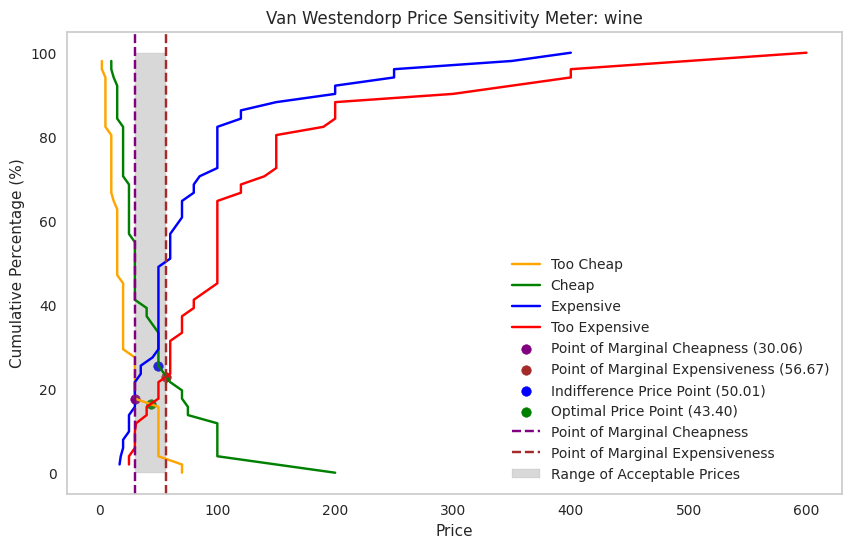

Van Westendorp Analysis for wine:
Point of Marginal Cheapness: 30.06
Point of Marginal Expensiveness: 56.67
Indifference Price Point: 50.01
Optimal Price Point: 43.40




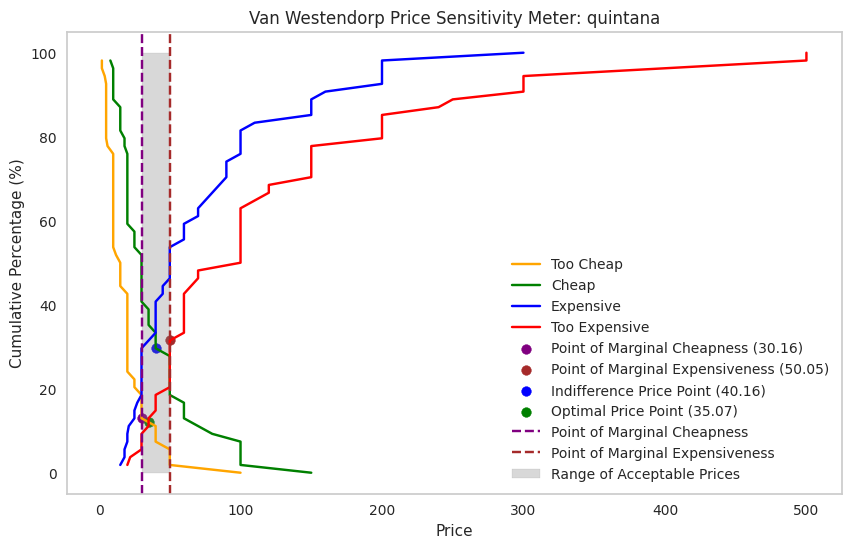

Van Westendorp Analysis for quintana:
Point of Marginal Cheapness: 30.16
Point of Marginal Expensiveness: 50.05
Indifference Price Point: 40.16
Optimal Price Point: 35.07




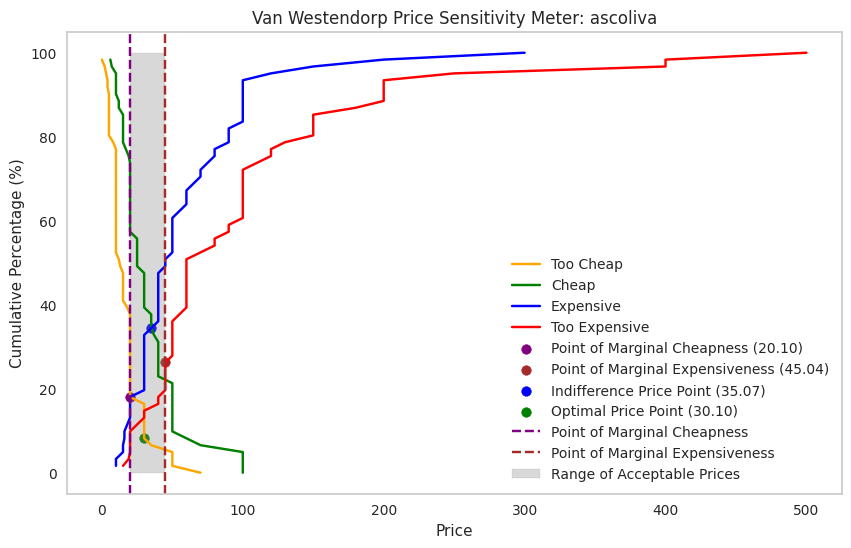

Van Westendorp Analysis for ascoliva:
Point of Marginal Cheapness: 20.10
Point of Marginal Expensiveness: 45.04
Indifference Price Point: 35.07
Optimal Price Point: 30.10




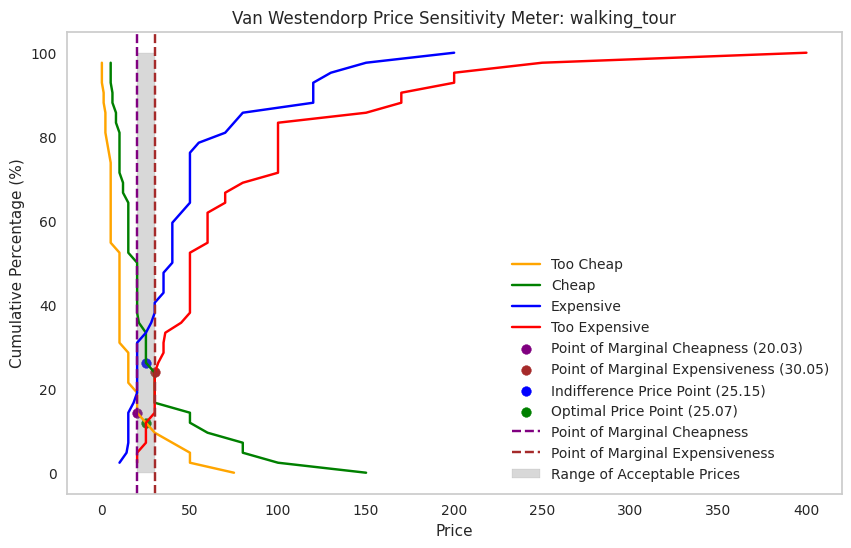

Van Westendorp Analysis for walking_tour:
Point of Marginal Cheapness: 20.03
Point of Marginal Expensiveness: 30.05
Indifference Price Point: 25.15
Optimal Price Point: 25.07




In [96]:
# Function to calculate intersection points between two curves
def find_intersection(x1, y1, x2, y2):
    # Interpolate both curves onto a common x-axis grid
    common_x = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), 500)
    y1_interp = np.interp(common_x, x1, y1)
    y2_interp = np.interp(common_x, x2, y2)

    # Calculate the difference between the two curves
    diff = y1_interp - y2_interp
    sign_change = np.where(np.diff(np.sign(diff)))[0]  # Detect zero-crossing

    # Calculate intersections
    intersections = []
    for idx in sign_change:
        x_intersect = np.interp(0, [diff[idx], diff[idx + 1]], [common_x[idx], common_x[idx + 1]])
        y_intersect = np.interp(x_intersect, x1, y1)  # Use one curve for the y-value
        intersections.append((x_intersect, y_intersect))
    return intersections

# Van Westendorp analysis function
def van_westendorp_analysis(product_name, df):
    # Extract the relevant columns
    too_cheap = df['Too Cheap']
    cheap = df['Cheap']
    expensive = df['Expensive']
    too_expensive = df['Too Expensive']

    # Function to calculate cumulative percentages
    def calculate_cumulative_percent(series, invert=False):
        sorted_series = np.sort(series)
        cum_percent = np.arange(1, len(sorted_series) + 1) / len(sorted_series) * 100
        if invert:
            cum_percent = 100 - cum_percent
        return sorted_series, cum_percent

    # Calculate cumulative percentages
    too_cheap_sorted, too_cheap_cum = calculate_cumulative_percent(too_cheap, invert=True)
    cheap_sorted, cheap_cum = calculate_cumulative_percent(cheap, invert=True)
    expensive_sorted, expensive_cum = calculate_cumulative_percent(expensive)
    too_expensive_sorted, too_expensive_cum = calculate_cumulative_percent(too_expensive)

    # Find intersections
    marginal_cheapness = find_intersection(too_cheap_sorted, too_cheap_cum, expensive_sorted, expensive_cum)
    marginal_expensiveness = find_intersection(too_expensive_sorted, too_expensive_cum, cheap_sorted, cheap_cum)
    indifference_price_point = find_intersection(cheap_sorted, cheap_cum, expensive_sorted, expensive_cum)
    optimal_price_point = find_intersection(too_cheap_sorted, too_cheap_cum, too_expensive_sorted, too_expensive_cum)

    # Extract specific x-values for range of acceptable prices
    x_marginal_cheapness = marginal_cheapness[0][0] if marginal_cheapness else None
    x_marginal_expensiveness = marginal_expensiveness[0][0] if marginal_expensiveness else None

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(too_cheap_sorted, too_cheap_cum, label='Too Cheap', color='orange')
    plt.plot(cheap_sorted, cheap_cum, label='Cheap', color='green')
    plt.plot(expensive_sorted, expensive_cum, label='Expensive', color='blue')
    plt.plot(too_expensive_sorted, too_expensive_cum, label='Too Expensive', color='red')

    # Mark intersection points with labels
    for x, y in marginal_cheapness:
        plt.scatter(x, y, color='purple', label=f'Point of Marginal Cheapness ({x:.2f})')
    for x, y in marginal_expensiveness:
        plt.scatter(x, y, color='brown', label=f'Point of Marginal Expensiveness ({x:.2f})')
    for x, y in indifference_price_point:
        plt.scatter(x, y, color='blue', label=f'Indifference Price Point ({x:.2f})')
    for x, y in optimal_price_point:
        plt.scatter(x, y, color='green', label=f'Optimal Price Point ({x:.2f})')

    # Draw vertical lines and label the range of acceptable prices
    if x_marginal_cheapness and x_marginal_expensiveness:
        plt.axvline(x=x_marginal_cheapness, color='purple', linestyle='--', label='Point of Marginal Cheapness')
        plt.axvline(x=x_marginal_expensiveness, color='brown', linestyle='--', label='Point of Marginal Expensiveness')
        plt.fill_betweenx([0, 100], x_marginal_cheapness, x_marginal_expensiveness, color='gray', alpha=0.3, label='Range of Acceptable Prices')

    plt.title(f"Van Westendorp Price Sensitivity Meter: {product_name}")
    plt.xlabel("Price")
    plt.ylabel("Cumulative Percentage (%)")
    plt.legend()
    plt.grid()
    plt.show()

    # Report only x-values
    print(f"Van Westendorp Analysis for {product_name}:")
    print(f"Point of Marginal Cheapness: {x_marginal_cheapness:.2f}" if x_marginal_cheapness else "Point of Marginal Cheapness: Not found")
    print(f"Point of Marginal Expensiveness: {x_marginal_expensiveness:.2f}" if x_marginal_expensiveness else "Point of Marginal Expensiveness: Not found")
    print(f"Indifference Price Point: {indifference_price_point[0][0]:.2f}" if indifference_price_point else "Indifference Price Point: Not found")
    print(f"Optimal Price Point: {optimal_price_point[0][0]:.2f}" if optimal_price_point else "Optimal Price Point: Not found")
    print("\n")

# Analyze each product
for product, df in product_dfs.items():
    van_westendorp_analysis(product, df)

**Analysis & Insights**

1. Wine

PMC: €30.06

PME: €56.67

IPP: €50.01

OPP: €43.40

The optimal price for wine is €43.40, which falls within the consumer-acceptable range (€30.06 - €56.67). At this price, consumers perceive the product as having good value without being too expensive. The indifference price point of €50.01 indicates a higher willingness to pay, suggesting potential room for premium positioning.

2. Quintana

PMC: €30.16

PME: €50.05

IPP: €40.16

OPP: €35.07

For Quintana, the optimal price is €35.07, which is lower than the indifference price point of €40.16. This suggests that consumers may be sensitive to pricing above €40, and pricing above the optimal point could reduce demand. The acceptable price range of (€30.16 - €50.05) provides some flexibility for promotional pricing.

3. Ascoliva

PMC: €20.10

PME: €45.04

IPP: €35.07

OPP: €30.10

The optimal price for Ascoliva is €30.10, positioned within a reasonable consumer-acceptable range of (€20.10 - €45.04). With an indifference price point of €35.07, consumers may still be comfortable with slightly higher pricing, though exceeding this threshold could impact perceived value. A value-driven approach in marketing may support this pricing.

4. Walking Tour

PMC: €20.03

PME: €30.05

IPP: €25.15

OPP: €25.07

The walking tour's optimal price is €25.07, aligning closely with the indifference price point of €25.15. This suggests that consumers are quite price-sensitive for this service, and deviation from this price could influence purchasing decisions significantly. Given the narrow acceptable price range (€20.03 - €30.05), strategic discounts and bundling with other services could help maintain perceived value.

**Conclusion & Recommendations**

**Wine:** The market allows for premium pricing up to €50, but an optimal price of €43.40 is recommended to balance affordability and perceived quality.

**Quintana:** A mid-range pricing strategy around €35.07 is ideal. However, strategic premium positioning could be considered given the €50.05 price ceiling.

**Ascoliva:** The optimal pricing of €30.10 suggests a value-driven approach, but slight flexibility exists up to €35.07 before resistance occurs.

**Walking Tour:** A price-sensitive offering where staying close to the optimal price of €25.07 is critical. Alternative revenue strategies such as upselling or bundling may help maximize profitability.

This analysis provides a data-driven foundation for pricing strategies that align with consumer perceptions while optimizing revenue potential. Adjustments should be made based on competitive positioning, target audience, and market trends.

### Van Westendorp Analysis without Outliers

#### Data processing to remove outliers

In [97]:
df_wine_out=df_wine[df_wine['Too Expensive']<df_wine['Too Expensive'].median()*2]
df_quintana_out=df_quintana[df_quintana['Too Expensive']<df_quintana['Too Expensive'].median()*2]
df_ascoliva_out=df_ascoliva[df_ascoliva['Too Expensive']<df_ascoliva['Too Expensive'].median()*2]
df_walking_tour_out=df_walking_tour[df_walking_tour['Too Expensive']<df_walking_tour['Too Expensive'].median()*2]

In [98]:
# Function to remove outliers using the IQR method
def remove_outliers(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [99]:
# Dictionary of DataFrames
product_dfs_out = {
    'wine': df_wine_out,
    'quintana': df_quintana_out,
    'ascoliva': df_ascoliva_out,
    'walking_tour': df_walking_tour_out
}
# Remove outliers for each product's DataFrame
for product, data in product_dfs_out.items():
    product_dfs_out[product] = remove_outliers(data)

In [100]:
# Ascoliva's removing 0
df_ascoliva_out=df_ascoliva_out[df_ascoliva_out['Too Cheap']!=0]

### Analysis

In [101]:
ProfileReport(df_wine_out)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

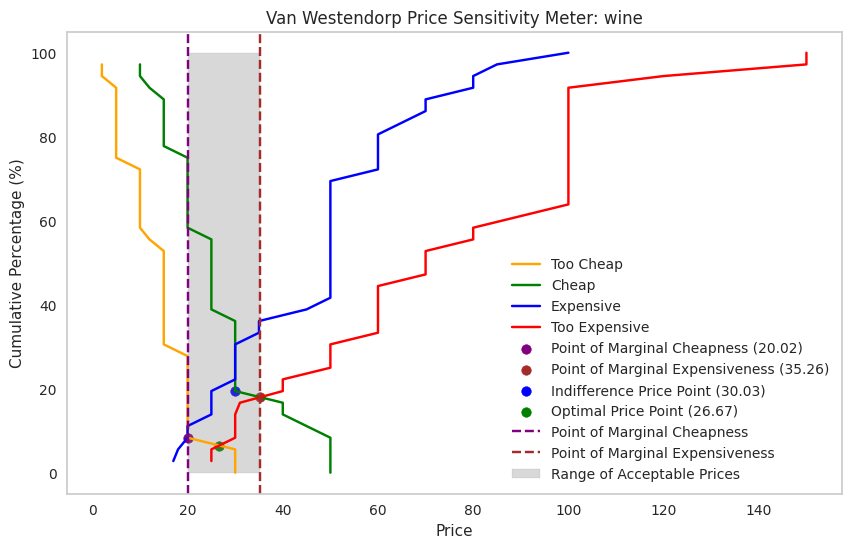

Van Westendorp Analysis for wine:
Point of Marginal Cheapness: 20.02
Point of Marginal Expensiveness: 35.26
Indifference Price Point: 30.03
Optimal Price Point: 26.67




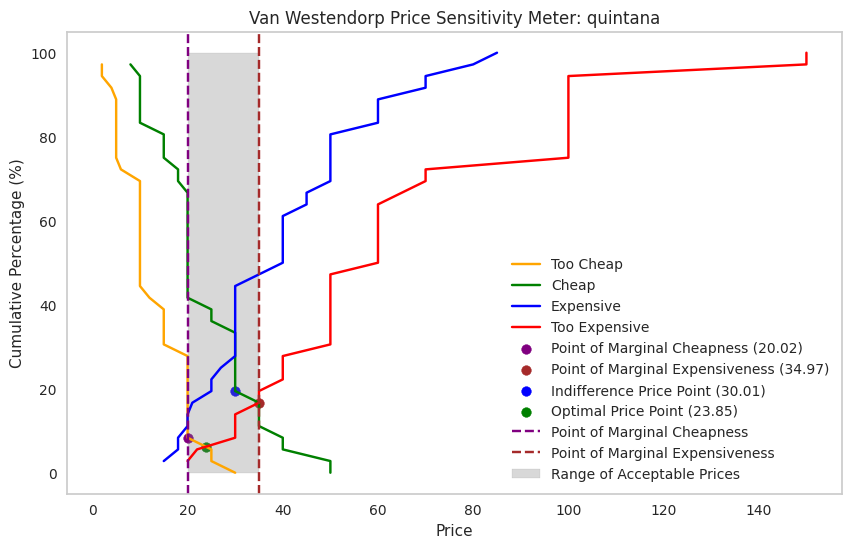

Van Westendorp Analysis for quintana:
Point of Marginal Cheapness: 20.02
Point of Marginal Expensiveness: 34.97
Indifference Price Point: 30.01
Optimal Price Point: 23.85




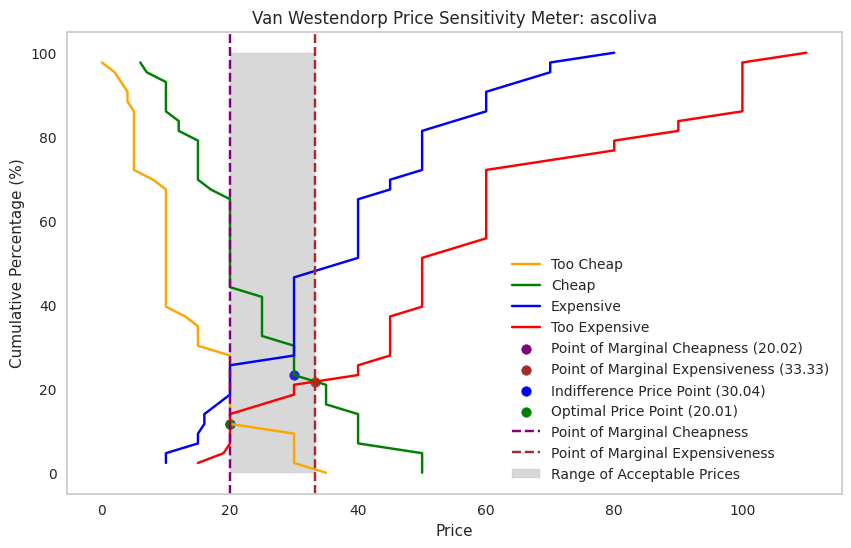

Van Westendorp Analysis for ascoliva:
Point of Marginal Cheapness: 20.02
Point of Marginal Expensiveness: 33.33
Indifference Price Point: 30.04
Optimal Price Point: 20.01




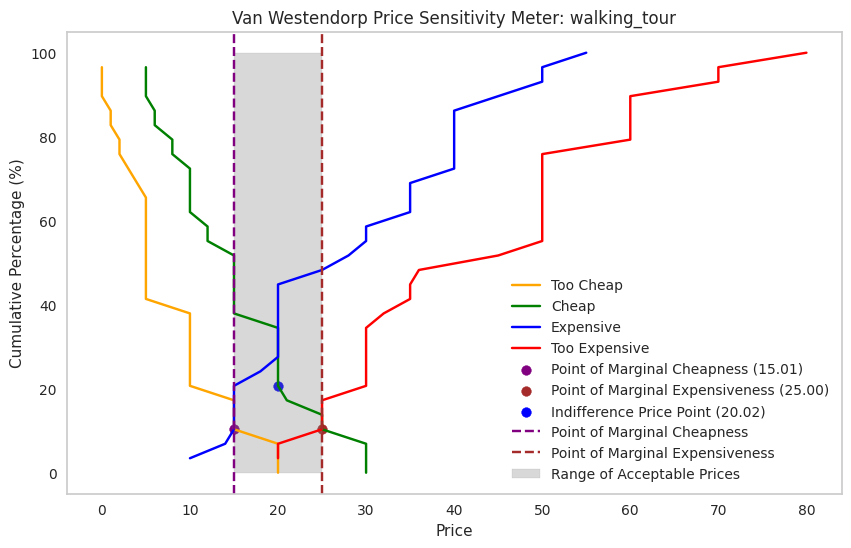

Van Westendorp Analysis for walking_tour:
Point of Marginal Cheapness: 15.01
Point of Marginal Expensiveness: 25.00
Indifference Price Point: 20.02
Optimal Price Point: Not found




In [102]:
# Function to calculate intersection points between two curves
def find_intersection(x1, y1, x2, y2):
    # Interpolate both curves onto a common x-axis grid
    common_x = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), 500)
    y1_interp = np.interp(common_x, x1, y1)
    y2_interp = np.interp(common_x, x2, y2)

    # Calculate the difference between the two curves
    diff = y1_interp - y2_interp
    sign_change = np.where(np.diff(np.sign(diff)))[0]  # Detect zero-crossing

    # Calculate intersections
    intersections = []
    for idx in sign_change:
        x_intersect = np.interp(0, [diff[idx], diff[idx + 1]], [common_x[idx], common_x[idx + 1]])
        y_intersect = np.interp(x_intersect, x1, y1)  # Use one curve for the y-value
        intersections.append((x_intersect, y_intersect))
    return intersections

# Van Westendorp analysis function
def van_westendorp_analysis(product_name, df):
    # Extract the relevant columns
    too_cheap = df['Too Cheap']
    cheap = df['Cheap']
    expensive = df['Expensive']
    too_expensive = df['Too Expensive']

    # Function to calculate cumulative percentages
    def calculate_cumulative_percent(series, invert=False):
        sorted_series = np.sort(series)
        cum_percent = np.arange(1, len(sorted_series) + 1) / len(sorted_series) * 100
        if invert:
            cum_percent = 100 - cum_percent
        return sorted_series, cum_percent

    # Calculate cumulative percentages
    too_cheap_sorted, too_cheap_cum = calculate_cumulative_percent(too_cheap, invert=True)
    cheap_sorted, cheap_cum = calculate_cumulative_percent(cheap, invert=True)
    expensive_sorted, expensive_cum = calculate_cumulative_percent(expensive)
    too_expensive_sorted, too_expensive_cum = calculate_cumulative_percent(too_expensive)

    # Find intersections
    marginal_cheapness = find_intersection(too_cheap_sorted, too_cheap_cum, expensive_sorted, expensive_cum)
    marginal_expensiveness = find_intersection(too_expensive_sorted, too_expensive_cum, cheap_sorted, cheap_cum)
    indifference_price_point = find_intersection(cheap_sorted, cheap_cum, expensive_sorted, expensive_cum)
    optimal_price_point = find_intersection(too_cheap_sorted, too_cheap_cum, too_expensive_sorted, too_expensive_cum)

    # Extract specific x-values for range of acceptable prices
    x_marginal_cheapness = marginal_cheapness[0][0] if marginal_cheapness else None
    x_marginal_expensiveness = marginal_expensiveness[0][0] if marginal_expensiveness else None

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(too_cheap_sorted, too_cheap_cum, label='Too Cheap', color='orange')
    plt.plot(cheap_sorted, cheap_cum, label='Cheap', color='green')
    plt.plot(expensive_sorted, expensive_cum, label='Expensive', color='blue')
    plt.plot(too_expensive_sorted, too_expensive_cum, label='Too Expensive', color='red')

    # Mark intersection points with labels
    for x, y in marginal_cheapness:
        plt.scatter(x, y, color='purple', label=f'Point of Marginal Cheapness ({x:.2f})')
    for x, y in marginal_expensiveness:
        plt.scatter(x, y, color='brown', label=f'Point of Marginal Expensiveness ({x:.2f})')
    for x, y in indifference_price_point:
        plt.scatter(x, y, color='blue', label=f'Indifference Price Point ({x:.2f})')
    for x, y in optimal_price_point:
        plt.scatter(x, y, color='green', label=f'Optimal Price Point ({x:.2f})')

    # Draw vertical lines and label the range of acceptable prices
    if x_marginal_cheapness and x_marginal_expensiveness:
        plt.axvline(x=x_marginal_cheapness, color='purple', linestyle='--', label='Point of Marginal Cheapness')
        plt.axvline(x=x_marginal_expensiveness, color='brown', linestyle='--', label='Point of Marginal Expensiveness')
        plt.fill_betweenx([0, 100], x_marginal_cheapness, x_marginal_expensiveness, color='gray', alpha=0.3, label='Range of Acceptable Prices')

    plt.title(f"Van Westendorp Price Sensitivity Meter: {product_name}")
    plt.xlabel("Price")
    plt.ylabel("Cumulative Percentage (%)")
    plt.legend()
    plt.grid()
    plt.show()

    # Report only x-values
    print(f"Van Westendorp Analysis for {product_name}:")
    print(f"Point of Marginal Cheapness: {x_marginal_cheapness:.2f}" if x_marginal_cheapness else "Point of Marginal Cheapness: Not found")
    print(f"Point of Marginal Expensiveness: {x_marginal_expensiveness:.2f}" if x_marginal_expensiveness else "Point of Marginal Expensiveness: Not found")
    print(f"Indifference Price Point: {indifference_price_point[0][0]:.2f}" if indifference_price_point else "Indifference Price Point: Not found")
    print(f"Optimal Price Point: {optimal_price_point[0][0]:.2f}" if optimal_price_point else "Optimal Price Point: Not found")
    print("\n")

# Analyze each product
for product, df in product_dfs_out.items():
    van_westendorp_analysis(product, df)

**Analysis & Insights**
1. Wine
* PMC: €20.02
* PME: €35.26
* IPP: €30.03
* OPP: €26.67
The optimal price for wine has been adjusted to €26.67, which now falls within a lower consumer-acceptable range (€20.02 - €35.26).** The refined analysis suggests that previous results were skewed by outliers, and consumer perception is more aligned with a mid-range price.**
2. Quintana
* PMC: €20.02
* PME: €34.97
* IPP: €30.01
* OPP: €23.85
For Quintana, the optimal price has been adjusted downward to €23.85 from previous estimates. The acceptable price range remains in €20.02 - €34.97, indicating that consumers exhibit a slightly higher price sensitivity than initially observed.
3. Ascoliva
* PMC: €20.02
* PME: €33.33
* IPP: €30.04
* OPP: €20.01
The refined optimal price for Ascoliva is now €20.01, suggesting that this product is perceived as highly price-sensitive. Given the range of €20.02 - €33.33, marketing efforts should emphasize value to maintain consumer interest without pricing too high.
4. Walking Tour
* PMC: €15.01
* PME: €25.00
* IPP: €20.02
* OPP: Not Found
For the walking tour, no definitive optimal price point was found after removing outliers. However, the acceptable price range (€15.01 - €25.00) suggests that pricing should remain within this window to ensure consumer willingness to pay. Additional consumer feedback may be required to determine an exact optimal price.

# Final General Conclusion

**Prices recommendation**

Using the final analysis of prices without outliers, we consider that ideal prices should be:

- **Wine:** With an adjusted optimal price of **€27.00** (€26.67), pricing should remain competitive while ensuring perceived quality. The removal of outliers suggests prior overestimations.
- **Quintana:** A more moderate pricing of **€24.00** (€23.85) is recommended. Previous results may have suggested a higher price tolerance than reality.
- **Ascoliva:** With an optimal price of **€20.00** (€20.01), the product is highly price-sensitive. A budget-friendly positioning is necessary.
- **Walking Tour:** No optimal price was determined, but pricing should remain between **€15.00 - €25.00** to stay within the consumer-acceptable range.

Apart from thss, as mentioned before, it's important to **offer some special discounts** (mainly to **cluster 1**) to provide more accesible prices and be an affordable destination for different type of gourps.

## Cluster 1: Social Savvy Budget Travelers

Ascoli Piceno has strong potential to attract **young travelers (18-25)** by leveraging its **affordability, vibrant events scene, and food experiences**. Since this group relies heavily on **restaurant reviews and social media influence**, the city should position itself as a dynamic and budget-friendly destination with engaging activities.

**Key Strategies for Ascoli Piceno:**

- **Social Media & Influencer Marketing:** Collaborate with **travel bloggers and influencers on TikTok and Instagram** to showcase Ascoli Piceno’s festivals, nightlife, and adventure activities. Encouraging **user-generated content and positive online reviews** will boost credibility and visibility.
- **Affordable Travel & Accommodation:** Promote budget-friendly hostels, student **discounts**, and **group travel deals** to make the city more accessible for young tourists.
- **Food & Cultural Appeal:** Highlight **local food experiences** through street food festivals, affordable restaurant recommendations, and partnerships with **food influencers** to enhance the city’s reputation as a culinary destination.
- **Weekend Travel Packages:** Create **cost-effective weekend travel bundles** that include nearby cities like Siena, Pisa, or Lucca, offering diverse experiences within a single trip, taking into account that this cluster would travel longer distances.

By focusing on **digital engagement, affordability, and unique experiences**, Ascoli Piceno can establish itself as a top choice for young, budget-conscious travelers seeking exciting and social tourism experiences.

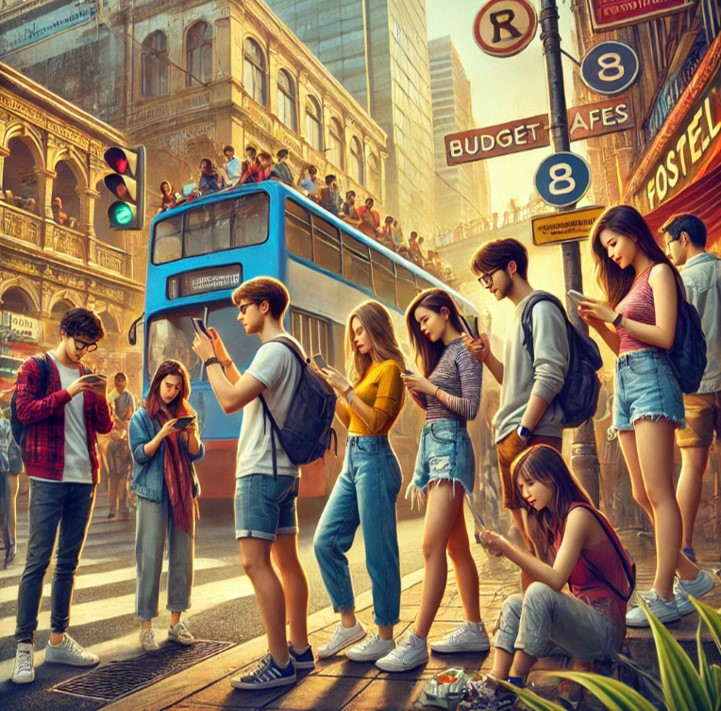

In [103]:
from IPython.display import display
from PIL import Image

img_path = "Cluster pictures/Cluster 1.jpg"
img = Image.open(img_path)
display(img)

## Cluster 2: Premium Experience Seekers

Ascoli Piceno can position itself as an ideal destination for **frequent travelers (26-35+)**, offering convenience, **premium experiences, and cultural depth**. Since this group prefers shorter weekend getaways (100-300 km) and values **high-quality accommodations and experiences**, the city should focus on creating a **refined yet accessible travel experience**.

**Key Strategies for Ascoli Piceno:**

- **Luxury & Convenience-Focused Getaways:** Develop **high-end weekend packages** that include **boutique hotels, fine dining, and private cultural tours to provide a seamless, premium experience**.
- **Enhanced Accessibility:** **Improve transportation connections** to make the city more accessible for regional and international visitors. Collaborating with **travel agencies** can encourage business-leisure travelers to choose Ascoli Piceno for quick escapes.
- **Cultural & Culinary Appeal:** Promote **immersive experiences** such as wine tastings, guided historical tours, and exclusive access to heritage sites, catering to travelers **seeking depth and authenticity**.
- **Loyalty & Repeat Tourism Initiatives:** Introduce a **weekend pass or loyalty program offering discounts** for multiple visits, encouraging repeat travelers and long-term engagement with the destination.

By enhancing **accessibility, premium experiences, and fostering repeat visits**, Ascoli Piceno can strengthen its appeal among experienced travelers looking for a refined and convenient getaway.

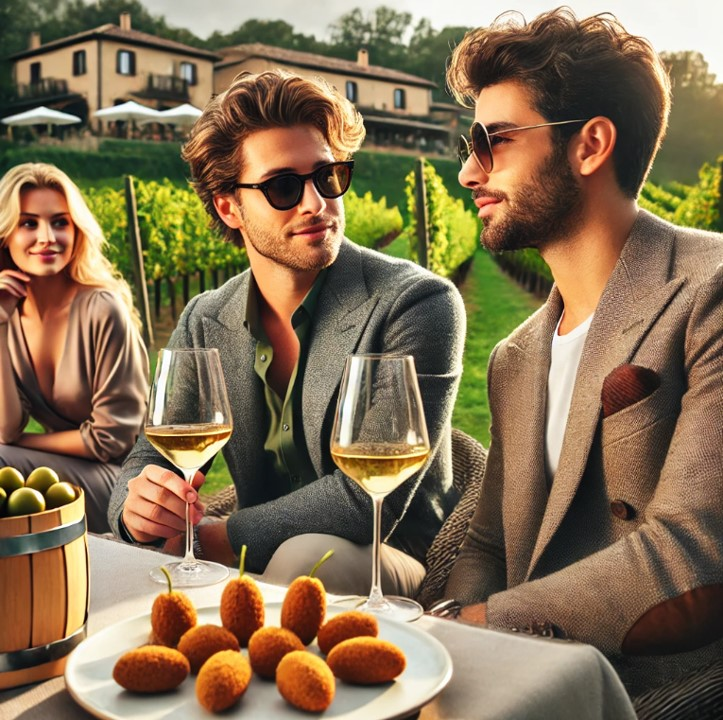

In [104]:
img2_path = "Cluster pictures/Cluster 2.jpg"
img2 = Image.open(img2_path)
display(img2)